#**Exploring the synergistic effect of ensembling machine learning models, bagging, and stacking them with other models to enhance the efficacy of Durning Centre PV energy predictive modeling**

COLLABORATIVE LEARNING INTEGRATION (CLI) ENSEMBLE MODEL

In [ ]:
import pandas as pd

# Read the CSV file using Pandas with ISO-8859-1 encoding
df = pd.read_csv('Durning centre data hourly captured - with enviromental features.csv', encoding='ISO-8859-1')

# Display the DataFrame
df.head(20)


Date      Time  Total Yield[kWh]  Solar Irradiance  \
0   01/01/2018  01:00:00             0.000              0.00   
1   01/01/2018  02:00:00             0.000              0.00   
2   01/01/2018  03:00:00             0.000              0.00   
3   01/01/2018  04:00:00             0.000              0.00   
4   01/01/2018  05:00:00             0.000              0.00   
5   01/01/2018  06:00:00             0.000              0.00   
6   01/01/2018  07:00:00             0.000              0.00   
7   01/01/2018  08:00:00             0.000              0.00   
8   01/01/2018  09:00:00             0.000             30.33   
9   01/01/2018  10:00:00             0.385             68.41   
10  01/01/2018  11:00:00             1.010            127.27   
11  01/01/2018  12:00:00             3.231            133.83   
12  01/01/2018  13:00:00             3.932             92.98   
13  01/01/2018  14:00:00             0.945             27.01   
14  01/01/2018  15:00:00             0.512             14.16   
15  01/01/2018  16:00:00             0.072              0.00   
16  01/01/2018  17:00:00             0.000              0.00   
17  01/01/2018  18:00:00             0.000              0.00   
18  01/01/2018  19:00:00             0.000              0.00   
19  01/01/2018  20:00:00             0.000              0.00   

    Temprature (2 meters)  Precipitation  Wind Speed (10 meters)  \
0                    5.76           0.29                    9.20   
1                    6.07           0.40                    9.98   
2                    6.23           0.28                    9.99   
3                    6.12           0.15                    9.28   
4                    6.02           0.10                    8.72   
5                    6.05           0.13                    8.39   
6                    6.13           0.12                    7.99   
7                    6.12           0.05                    7.43   
8                    6.29           0.02                    7.24   
9                    6.66           0.01                    7.53   
10                   7.00           0.03                    8.02   
11                   7.08           0.11                    8.92   
12                   6.90           0.21                    9.69   
13                   6.64           0.32                   10.14   
14                   6.29           0.42                   10.35   
15                   6.27           0.36                   11.06   
16                   6.41           0.20                   12.18   
17                   6.37           0.05                   12.52   
18                   6.22           0.01                   11.22   
19                   6.00           0.01                    9.31   

    Wind Direction (10 meters)  
0                       239.93  
1                       236.78  
2                       237.25  
3                       235.04  
4                       232.90  
5                       234.93  
6                       240.68  
7                       247.70  
8                       252.80  
9                       253.99  
10                      251.60  
11                      253.15  
12                      259.03  
13                      266.91  
14                      276.50  
15                      288.96  
16                      300.15  
17                      306.19  
18                      306.10  
19                      300.91

# Getting summary statistics for the entire dataset

Getting summary statistics for the entire dataset is a fundamental step. It involves calculating and reviewing various statistical measures that summarize the main features of a dataset, usually in a tabular form. This process provides a quick overview of the data, helping to understand its distribution, central tendency, variability, and other key characteristics. Here's what is typically included in summary statistics

In [ ]:
# Getting summary statistics for the entire dataset
summary_statistics = df.describe()
summary_statistics


Total Yield[kWh]  Solar Irradiance  Temprature (2 meters)  \
count      43824.000000      43824.000000           43824.000000   
mean           3.354961        120.142445              10.295730   
std            5.869684        184.718864               5.092031   
min            0.000000          0.000000              -4.150000   
25%            0.000000          0.000000               6.390000   
50%            0.006000          7.990000              10.050000   
75%            4.170000        183.082500              14.170000   
max           29.568000        888.040000              29.200000   

       Precipitation  Wind Speed (10 meters)  Wind Direction (10 meters)  
count   43824.000000            43824.000000                43824.000000  
mean        0.115762                5.420184                  204.473285  
std         0.291668                2.805951                   87.118625  
min         0.000000                0.000000                    0.000000  
25%         0.000000                3.340000                  141.520000  
50%         0.010000                4.950000                  216.965000  
75%         0.090000                7.090000                  272.982500  
max         6.650000               21.470000                  359.900000

In [ ]:
df.isnull().sum() #to get the number of missing records in each column

Date                          0
Time                          0
Total Yield[kWh]              0
Solar Irradiance              0
Temprature (2 meters)         0
Precipitation                 0
Wind Speed (10 meters)        0
Wind Direction (10 meters)    0
dtype: int64

In [ ]:
(df.isnull().sum()/(len(df)))*100 #to calculate the percentage of missing values in each column

Date                          0.0
Time                          0.0
Total Yield[kWh]              0.0
Solar Irradiance              0.0
Temprature (2 meters)         0.0
Precipitation                 0.0
Wind Speed (10 meters)        0.0
Wind Direction (10 meters)    0.0
dtype: float64

The dataset contains 49655 rows of element and covers a time stamp from January 2018 to August 2023.

# Renaming the Columns to give clearer Meaning of terms

In [ ]:
# Creating a new dataframe 'historical_data' with the same content as 'df'
historical_data = df.copy()

# Renaming the columns
historical_data.rename(columns={
    'ALLSKY_SFC_SW_DWN': 'All sky solar irradiance',
    'T2M': 'Temperature in degree',
    'PRECTOTCORR': 'Precipitation',
    'WS10M': 'Wind speed at 10 meters',
    'WD10M': 'Wind direction at 10 meters'
}, inplace=True)

# Displaying the first few rows of the new dataframe
historical_data.head()

Date      Time  Total Yield[kWh]  Solar Irradiance  \
0  01/01/2018  01:00:00               0.0               0.0   
1  01/01/2018  02:00:00               0.0               0.0   
2  01/01/2018  03:00:00               0.0               0.0   
3  01/01/2018  04:00:00               0.0               0.0   
4  01/01/2018  05:00:00               0.0               0.0   

   Temprature (2 meters)  Precipitation  Wind Speed (10 meters)  \
0                   5.76           0.29                    9.20   
1                   6.07           0.40                    9.98   
2                   6.23           0.28                    9.99   
3                   6.12           0.15                    9.28   
4                   6.02           0.10                    8.72   

   Wind Direction (10 meters)  
0                      239.93  
1                      236.78  
2                      237.25  
3                      235.04  
4                      232.90

# SIZE AND SPECIFICATION OF THE SYSTEM


The system is a 39.02kWp PV System with installation arrangement of a 33.84kWp roof top system consisting of 144 x 235W Yingli modules at 10 degrees pitch to roof and 5.18kWp facade system consisting of 28 x 185W Solarcentury modules mounted vertically.

Noteworthy, the PV relative weather parameters data gotten NASA Prediction of Worldwide Energy Resources for the Prediction Of Worldwide Energy Resources (POWER) https://power.larc.nasa.gov/data-access-viewer/ for Edge Hill University, Ormskirk on Latitude 53.558622, Longitude -2.875178 are:

    1. All sky solar irradiance  (kW/m2)
        2. Temperature in degree
            3. precipitation in (mm)
                4. Wind speed at 10 meters in m/s
                    5. Wind direction at 10 meters in degree
The choice of the weather parameters selected thus far in this study is as advised by literatures on Photovoltaic System performance influncers.

Next is the:


1. Data Quality Check

A. Check for Missing Values
We will first check for any missing values in the dataset.

B. Identify Anomalies/Outliers
We will look for any anomalies or outliers in the dataset that could affect the analysis.

C. Validate Data Types
We'll ensure that each column has the appropriate data type, especially the date and time columns.

# Data Quality Check

In [ ]:
# Data Quality Check

# A. Check for Missing Values
missing_values = df.isnull().sum()

# B. Identify Anomalies/Outliers
# For a basic check, we'll look at the statistical summary again, focusing on extreme values.
potential_outliers = df.describe()

# C. Validate Data Types
data_types = df.dtypes

missing_values, potential_outliers, data_types

(Date                          0
 Time                          0
 Total Yield[kWh]              0
 Solar Irradiance              0
 Temprature (2 meters)         0
 Precipitation                 0
 Wind Speed (10 meters)        0
 Wind Direction (10 meters)    0
 dtype: int64,
        Total Yield[kWh]  Solar Irradiance  Temprature (2 meters)  \
 count      43824.000000      43824.000000           43824.000000   
 mean           3.354961        120.142445              10.295730   
 std            5.869684        184.718864               5.092031   
 min            0.000000          0.000000              -4.150000   
 25%            0.000000          0.000000               6.390000   
 50%            0.006000          7.990000              10.050000   
 75%            4.170000        183.082500              14.170000   
 max           29.568000        888.040000              29.200000   
 
        Precipitation  Wind Speed (10 meters)  Wind Direction (10 meters)  
 count   43824.000000 

A. Missing Value Point

There are no missing values in the dataset. Each column is fully populated.

It is worth mentioning that prior data analysis was conducted on microsoft excel to eliminate few cases of missing data point as a result of:

1. Network Glitch during the upload of the data set to the monitoring portal.
2. Network or Site Specific Glitches during the download of the weather datas.

The few cases of missing data were handled by replacing the missing data point with a similar values for the previous year to avoid biased analysis.


B. Anomalies/Outliers

Based on the summary statistics, there don't appear to be significant anomalies or outliers. The maximum and minimum values for each feature seem within reasonable ranges, but a deeper analysis (such as visualizing with box plots) might be needed for a conclusive assessment.

C. Data Types

Date and Time are currently of the object type. These should ideally be converted to a datetime format for easier manipulation and analysis.
Other columns like Total Yield[kWh], ALLSKY_SFC_SW_DWN, T2M, PRECTOTCORR, WS10M, and WD10M are of type float64, which is appropriate for numerical data.

In [ ]:
df.head()

Date      Time  Total Yield[kWh]  Solar Irradiance  \
0  01/01/2018  01:00:00               0.0               0.0   
1  01/01/2018  02:00:00               0.0               0.0   
2  01/01/2018  03:00:00               0.0               0.0   
3  01/01/2018  04:00:00               0.0               0.0   
4  01/01/2018  05:00:00               0.0               0.0   

   Temprature (2 meters)  Precipitation  Wind Speed (10 meters)  \
0                   5.76           0.29                    9.20   
1                   6.07           0.40                    9.98   
2                   6.23           0.28                    9.99   
3                   6.12           0.15                    9.28   
4                   6.02           0.10                    8.72   

   Wind Direction (10 meters)  
0                      239.93  
1                      236.78  
2                      237.25  
3                      235.04  
4                      232.90

In [ ]:
import pandas as pd

# Assuming df is your DataFrame
df["Date"] = df["Date"].astype(str)
df["Time"] = df["Time"].astype(str)

# Combine "Date" and "Time" columns into a single string column
df["DateTime"] = df["Date"] + " " + df["Time"]

# Convert the combined column to datetime, specifying the format
df["DateTime"] = pd.to_datetime(df["DateTime"], format="%d/%m/%Y %H:%M:%S")

# Drop the original "Date" and "Time" columns if needed
# df = df.drop(["Date", "Time"], axis=1)



In [ ]:
df.set_index('DateTime', inplace=True)

In [ ]:
df.drop(columns = ["Date", "Time"], inplace = True)

In [ ]:
df


Total Yield[kWh]  Solar Irradiance  \
DateTime                                                  
2018-01-01 01:00:00               0.0               0.0   
2018-01-01 02:00:00               0.0               0.0   
2018-01-01 03:00:00               0.0               0.0   
2018-01-01 04:00:00               0.0               0.0   
2018-01-01 05:00:00               0.0               0.0   
...                               ...               ...   
2022-12-31 20:00:00               0.0               0.0   
2022-12-31 21:00:00               0.0               0.0   
2022-12-31 22:00:00               0.0               0.0   
2022-12-31 23:00:00               0.0               0.0   
2022-12-31 00:00:00               0.0               0.0   

                     Temprature (2 meters)  Precipitation  \
DateTime                                                    
2018-01-01 01:00:00                   5.76           0.29   
2018-01-01 02:00:00                   6.07           0.40   
2018-01-01 03:00:00                   6.23           0.28   
2018-01-01 04:00:00                   6.12           0.15   
2018-01-01 05:00:00                   6.02           0.10   
...                                    ...            ...   
2022-12-31 20:00:00                   8.84           0.48   
2022-12-31 21:00:00                   8.92           0.51   
2022-12-31 22:00:00                   8.90           0.32   
2022-12-31 23:00:00                   8.75           0.20   
2022-12-31 00:00:00                   8.62           0.20   

                     Wind Speed (10 meters)  Wind Direction (10 meters)  
DateTime                                                                 
2018-01-01 01:00:00                    9.20                      239.93  
2018-01-01 02:00:00                    9.98                      236.78  
2018-01-01 03:00:00                    9.99                      237.25  
2018-01-01 04:00:00                    9.28                      235.04  
2018-01-01 05:00:00                    8.72                      232.90  
...                                     ...                         ...  
2022-12-31 20:00:00                    5.01                      221.27  
2022-12-31 21:00:00                    6.08                      219.68  
2022-12-31 22:00:00                    7.32                      218.02  
2022-12-31 23:00:00                    8.16                      217.57  
2022-12-31 00:00:00                    8.66                      220.28  

[43824 rows x 6 columns]

In [ ]:
# Summation of the 'Total Yield[kWh]' column
total_yield_sum = df['Total Yield[kWh]'].sum()

# Average of the 'Total Yield[kWh]' column
total_yield_avg = df['Total Yield[kWh]'].mean()

# Display the results
print(f"Total Sum of 'Total Yield[kWh]': {total_yield_sum}")
print(f"Average of 'Total Yield[kWh]': {total_yield_avg}")


Total Sum of 'Total Yield[kWh]': 147027.81399999998
Average of 'Total Yield[kWh]': 3.3549610715589626


In [ ]:
# import pandas as pd

# # Assuming 'df' is your DataFrame and it already has 'Date' and 'Time' columns

# # Convert 'Date' and 'Time' into a single datetime column with the correct format
# df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')

# # Set this new column as the index of the dataframe
# df.set_index('DateTime', inplace=True)

# # Drop the original 'Date' and 'Time' columns
# df.drop(['Date', 'Time'], axis=1, inplace=True)

# # Display the first few rows of the updated dataframe
# print(df.head())

The Date and Time columns have been successfully merged into a single datetime column named 'DateTime', which is now set as the index of the dataframe. This format is more suitable for time series analysis

# Continuing with Time Series Specific Analysis of the PV System
PLOTTING THE TOTAL OUTPUT GENERATION OF THE DURNING CENTRE PV SYSTEM [kWh]



When plotting the 'Total Yield[kWh]' time series, you are visually representing the data points of your 'Total Yield[kWh]' variable over a specified time period. This graphical representation is crucial in time series analysis as it provides insights into various aspects of the data, including trends, patterns, seasonality, and anomalies. Here's what happens and what to look for in such a plot:

    Time on X-Axis: The X-axis typically represents time. Each data point on the plot corresponds to a specific time interval (e.g. annually as represented).

    Total Yield on Y-Axis: The Y-axis represents the values of 'Total Yield[kWh]'. These values could represent energy yield, production.

    Data Points: Each point on the plot represents the value of 'Total Yield[kWh]' at a specific time. These points are plotted chronologically.

    Line Connecting Points: In a line plot, the data points are usually connected in the order they occur. This line helps in identifying patterns, trends, and fluctuations in the data over time.

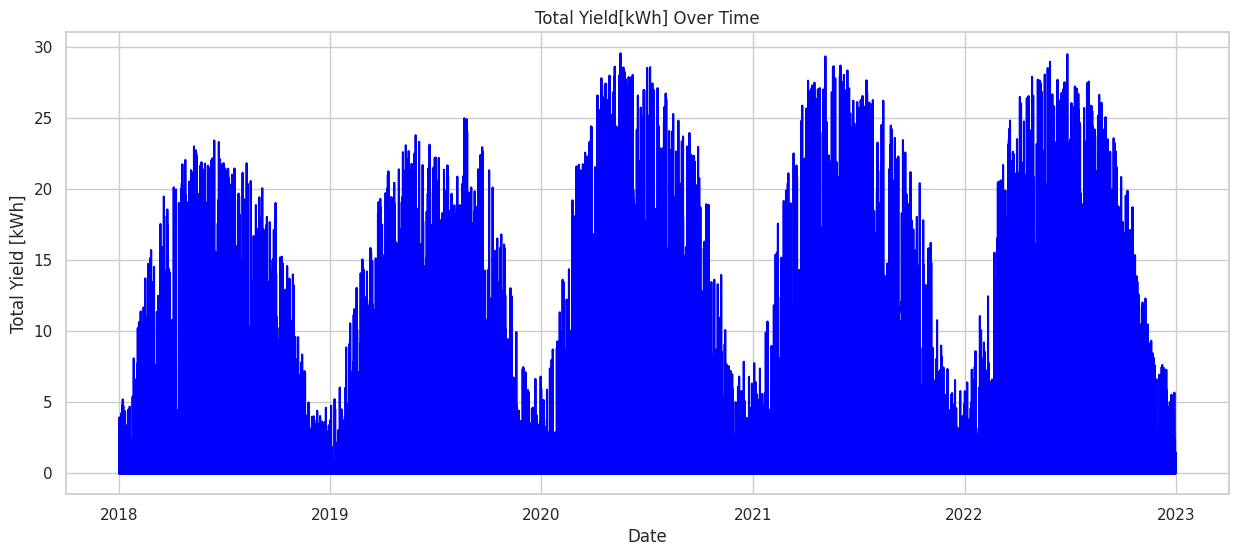

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Plotting the 'Total Yield[kWh]' time series
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['Total Yield[kWh]'], color='blue')
plt.title('Total Yield[kWh] Over Time')
plt.xlabel('Date')
plt.ylabel('Total Yield [kWh]')
plt.show()


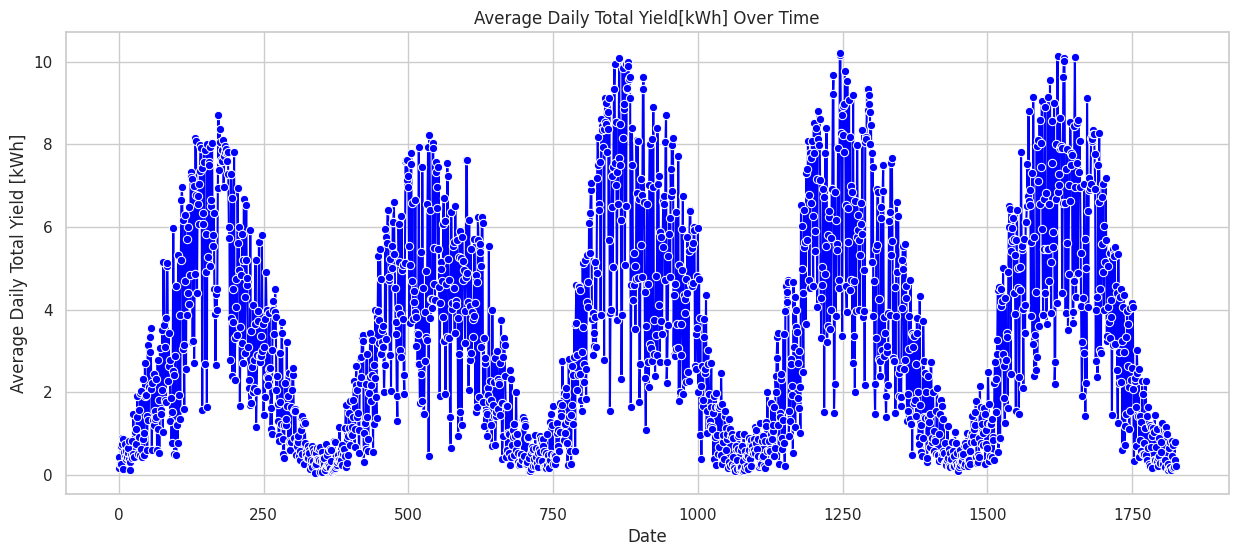

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'df' is already loaded and prepared with a DateTime index

# Calculate the average daily total yield specifically for the 'Total Yield[kWh]' column
daily_yield_avg = df['Total Yield[kWh]'].resample('D').mean()

# Convert the Series to DataFrame and reset the index to get 'Datetime' in a column
daily_yield_avg = daily_yield_avg.reset_index()

# Step 2: Creating a line plot to observe daily trends
plt.figure(figsize=(15, 6))
# Ensure the column names are correctly referenced
sns.lineplot(x=daily_yield_avg.index, y='Total Yield[kWh]', data=daily_yield_avg, color='blue', marker='o')
plt.title('Average Daily Total Yield[kWh] Over Time')
plt.xlabel('Date')
plt.ylabel('Average Daily Total Yield [kWh]')
plt.grid(True)
plt.show()



# Regression plot for the time series of 'Total Yield[kWh]
To analyze the relationship between 'Total Yield[kWh]' and the other features based on the regression plots, we typically look for the direction and shape of the regression line.

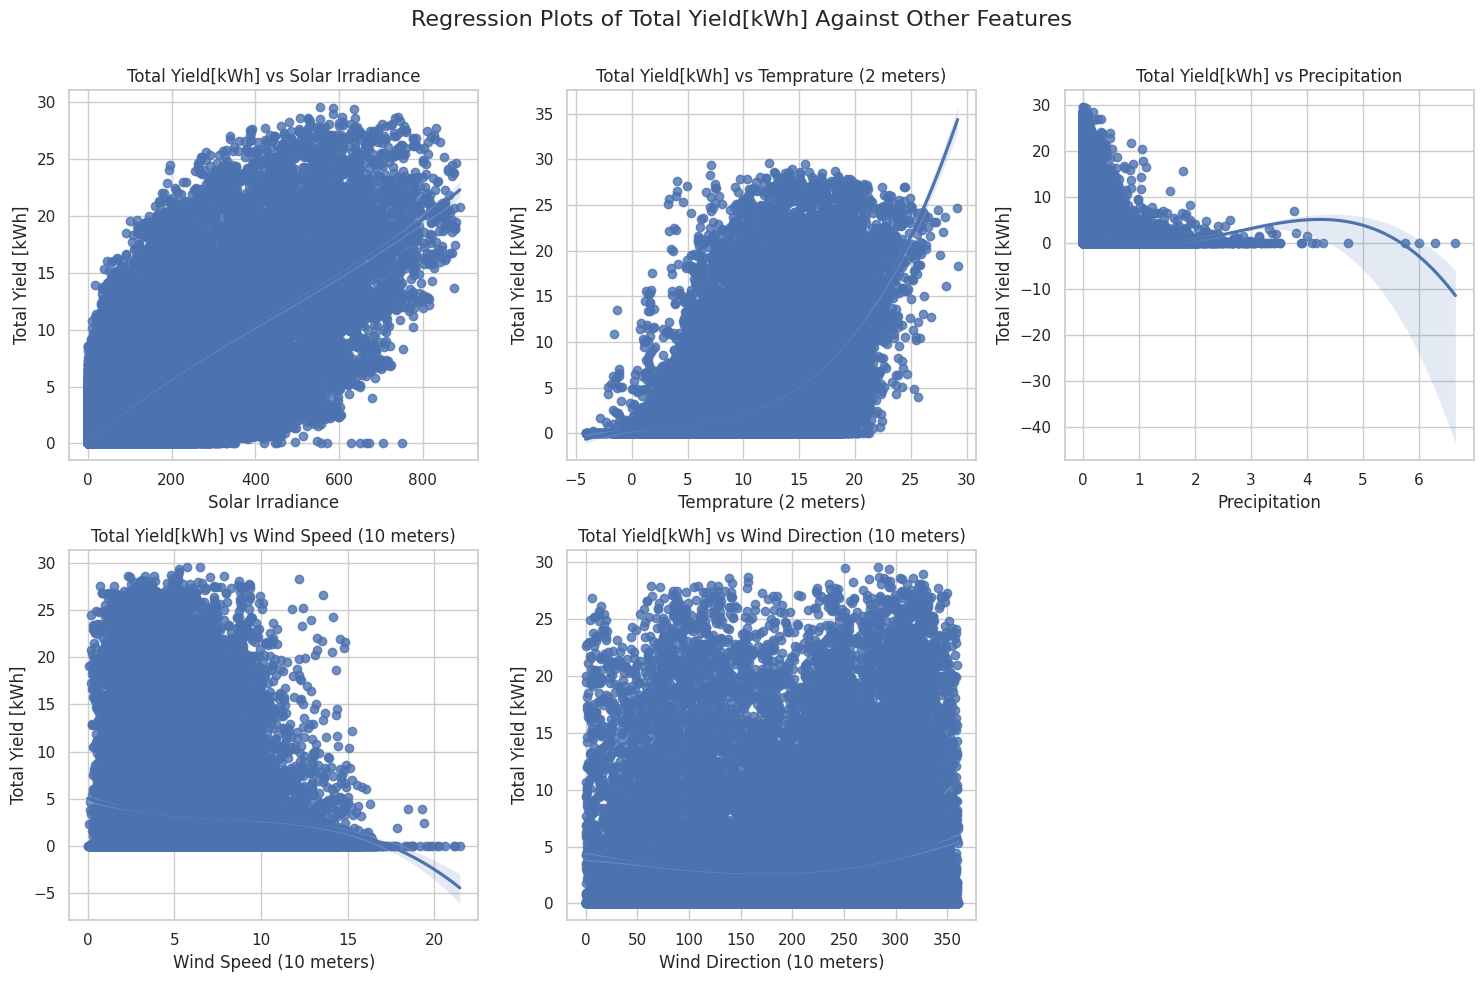

In [ ]:
# regression plot for the time series of 'Total Yield[kWh]'

# Trying a different approach to plot the time series
# Creating regression plots of 'Total Yield[kWh]' against all other features

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your dataframe
# Replace 'df' with the name of your dataframe variable

# Selecting the features for regression plots
features = df.columns.drop('Total Yield[kWh]')

# Determine the number of rows and columns for the subplots
num_features = len(features)
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols  # Round up division

# Setting up the matplotlib figure
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 5))
fig.suptitle('Regression Plots of Total Yield[kWh] Against Other Features', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterating over the features to create regression plots
for i, feature in enumerate(features):
    sns.regplot(x=df[feature], y=df['Total Yield[kWh]'], ax=axes[i], order=3)
    axes[i].set_title(f'Total Yield[kWh] vs {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Total Yield [kWh]')

# Remove any extra subplots
for j in range(i + 1, num_cols * num_rows):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust this as needed for the title
plt.show()



From the Regression Plot We look for:
    
   Directly Proportional (Positive Relationship): If the regression line slopes upwards as the feature increases, it indicates a positive relationship. This means as the feature value increases, the 'Total Yield[kWh]' also increases.

    Inversely Proportional (Negative Relationship): If the regression line slopes downwards, it indicates a negative relationship. This means as the feature value increases, the 'Total Yield[kWh]' decreases.

    Partially Proportional: If the regression line is more complex (e.g., a cubic shape), the relationship may change at different values of the feature. This can indicate a partially proportional relationship where 'Total Yield[kWh]' may increase with the feature up to a certain point and then decrease, or vice versa.

    No Clear Relationship: If the data points are very scattered and do not show any clear trend with the regression line, it might indicate that there is no clear relationship, or that other factors are influencing the relationship.

# The correlation matrix
The correlation matrix is to quantitatively analyze the relationships between 'Total Yield[kWh]' and other features. The correlation matrix provides a numeric representation of the relationships, where values close to +1 indicate a strong positive correlation, values close to -1 indicate a strong negative correlation, and values around 0 indicate no linear correlation

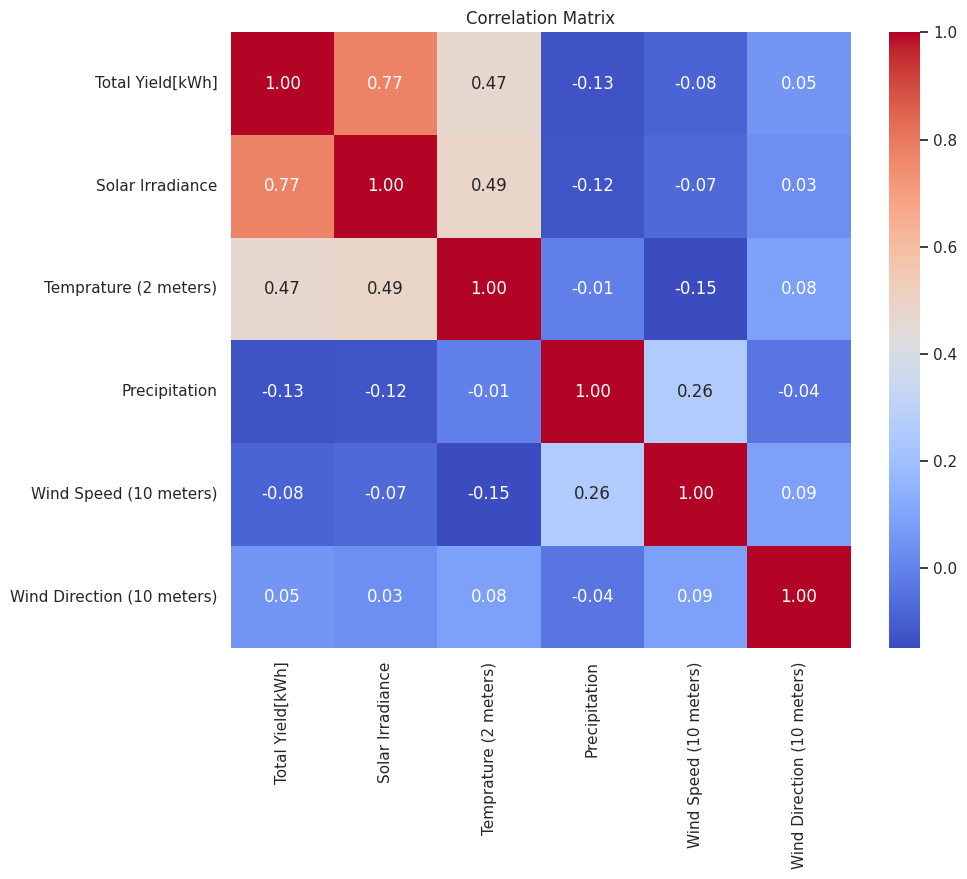

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


Let's interpret each of these coefficients as the relates to the total yeild of the PV System:

    Correlation Coefficient = 1: This is the correlation of 'Total Yield[kWh]' with itself, which is always 1.

    Correlation Coefficient = 0.77: This indicates a strong positive linear relationship. A feature with this correlation increases, 'Total Yield[kWh]' tends to increase as well. This is a significant correlation, suggesting that the feature is a good predictor of 'Total Yield[kWh]'.

    Correlation Coefficient = 0.46: This represents a moderate positive linear relationship. As this feature increases, 'Total Yield[kWh]' tends to increase, but not as strongly as the feature with a 0.77 correlation.

    Correlation Coefficient = -0.13: This is a weak negative linear relationship. As this feature increases, 'Total Yield[kWh]' tends to decrease slightly. However, the correlation is weak, implying that the feature is not a strong predictor of 'Total Yield[kWh]'.

    Correlation Coefficient = -0.08: This also indicates a weak negative linear relationship, even weaker than the -0.13 correlation. The influence of this feature on 'Total Yield[kWh]' is minimal.

    Correlation Coefficient = 0.05: This suggests a very weak positive linear relationship, almost negligible. This feature does not significantly affect 'Total Yield[kWh]'.

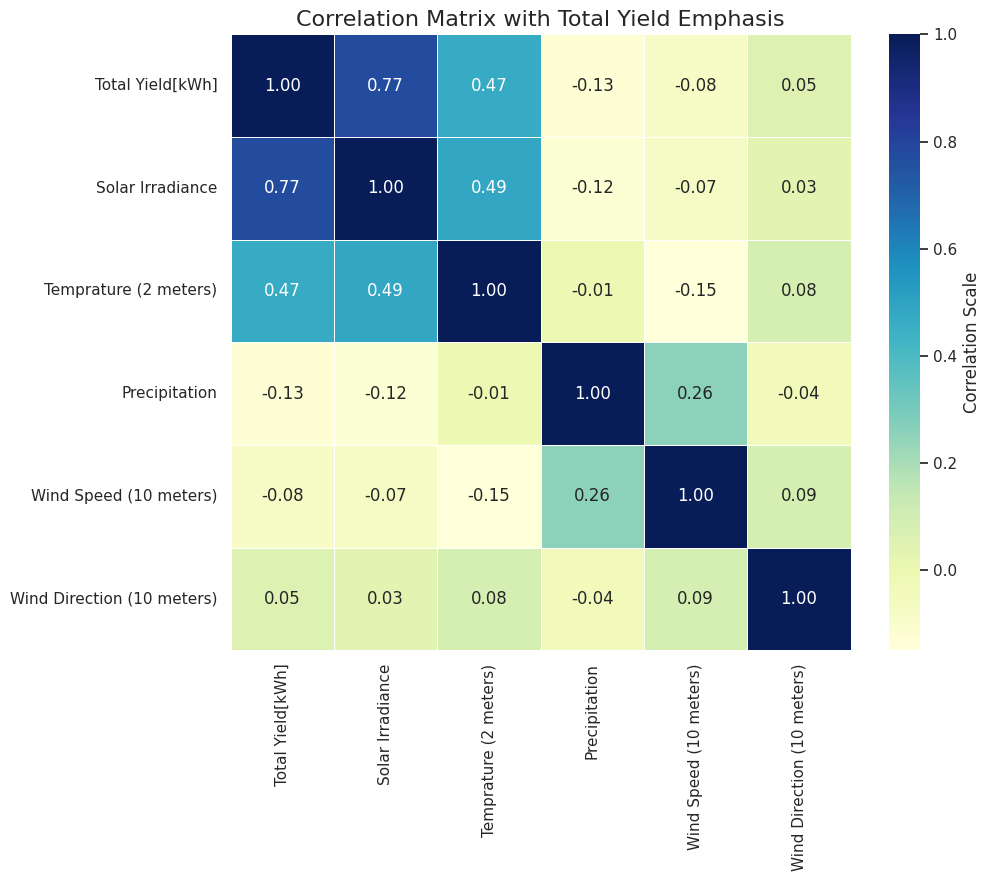

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is your DataFrame containing the data
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create the heatmap with customized settings
plt.figure(figsize=(10, 8))  # Adjust figure size for better readability
sns.heatmap(correlation_matrix,
            annot=True,          # Show correlation values
            cmap='YlGnBu',       # Use the 'YlGnBu' color scheme for better visibility
            fmt=".2f",           # Format annotations to 2 decimal places
            linewidths=0.5,      # Set linewidths for grid lines
            cbar_kws={'label': 'Correlation Scale'})  # Add color bar label

# Add the title
plt.title('Correlation Matrix with Total Yield Emphasis', fontsize=16)

# Display the plot
plt.show()



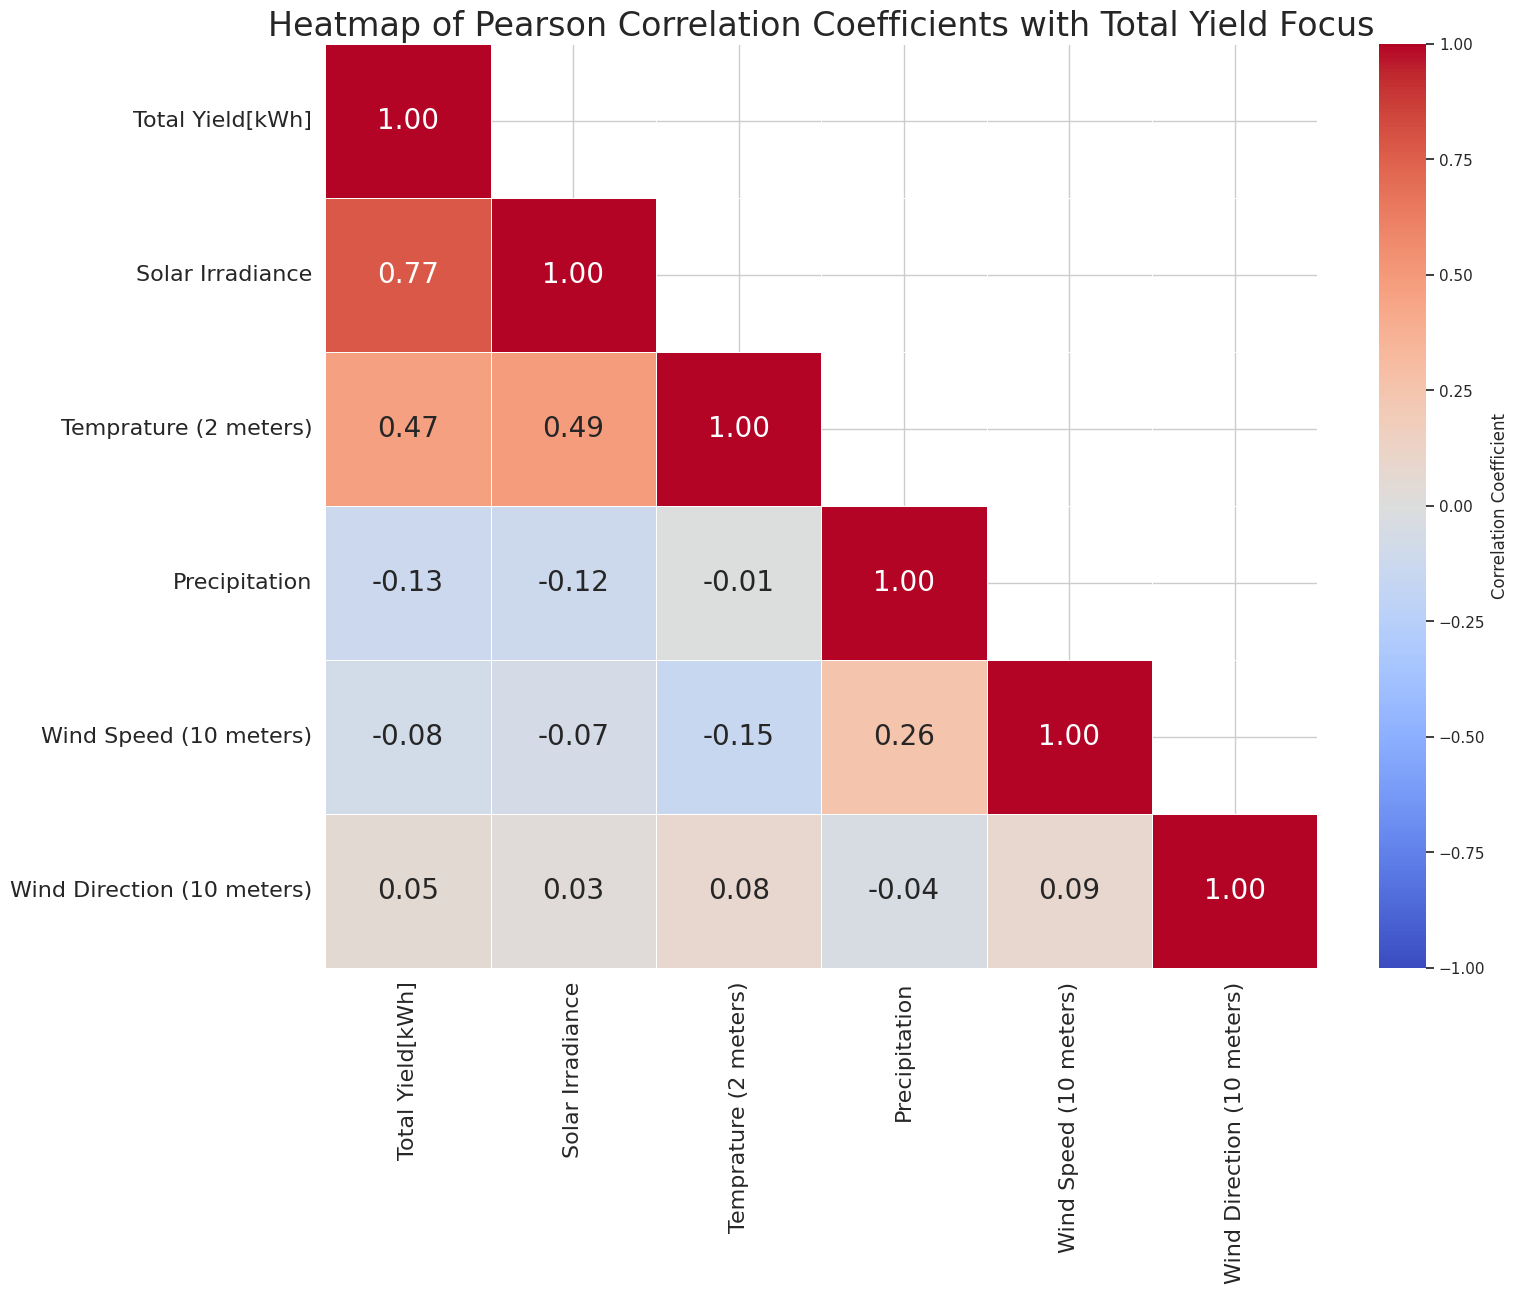

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is your DataFrame containing the data
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Mask for the upper triangle (without masking the diagonal, i.e., keep Total Yield vs. Total Yield visible)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)  # Mask only the upper triangle, excluding the diagonal

# Set up the matplotlib figure (double-column size, adjust as needed)
fig, ax = plt.subplots(figsize=(16, 12))  # Set up figure with axes

# Draw the heatmap with the mask and larger font for the numbers
sns.heatmap(correlation_matrix,
            mask=mask,           # Mask the upper triangle excluding the diagonal
            annot=True,          # Show correlation values
            cmap='coolwarm',     # Use 'coolwarm' color scheme
            fmt=".2f",           # Format annotations to 2 decimal places
            annot_kws={"size": 20},  # Increase the font size of annotations (correlation values)
            linewidths=0.5,      # Set linewidths for grid lines
            cbar_kws={'label': 'Correlation Coefficient'},  # Add color bar label
            vmin=-1, vmax=1,     # Set color bar range for Pearson correlation
            ax=ax)               # Add the axes to the plot

# Customize font sizes for title and labels
plt.title('Heatmap of Pearson Correlation Coefficients with Total Yield Focus', fontsize=24)  # Bigger title
plt.xticks(fontsize=16)  # Increase x-axis labels font size
plt.yticks(fontsize=16)  # Increase y-axis labels font size

# Save the figure as a high-resolution PNG for reporting (500 dpi)
plt.savefig('/content/correlation_heatmap.png', dpi=500, bbox_inches='tight')  # Save to Colab's local directory

# Show the plot
plt.show()

# Download the file directly from Colab
from google.colab import files
files.download('/content/correlation_heatmap.png')


# Annual Generation Output of the PV System

 Bar plot and a line plot, both showing the total annual generation output for each year. The bar plot provides a clear comparison between years, while the line plot may help in identifying trends over time.

<ipython-input-43-80c9cb6b39fe>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=annual_yield.index, y=annual_yield.values, palette="viridis")


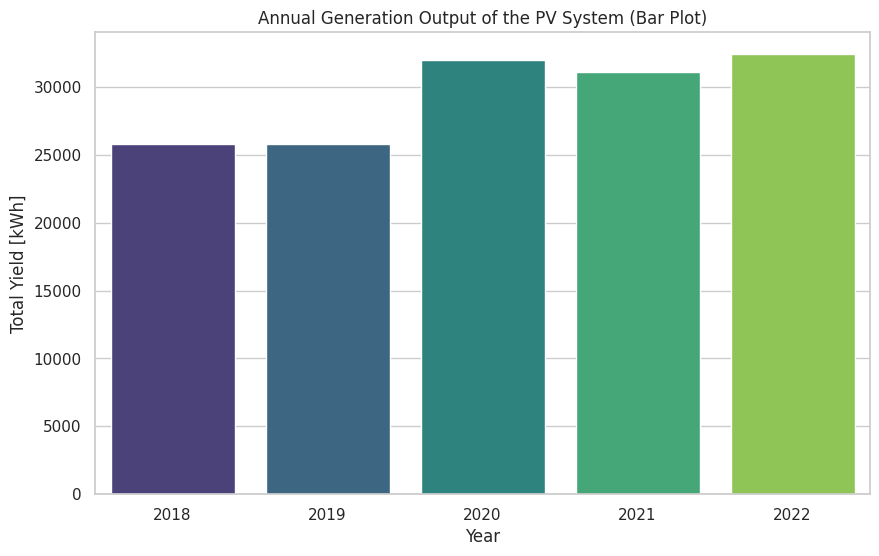

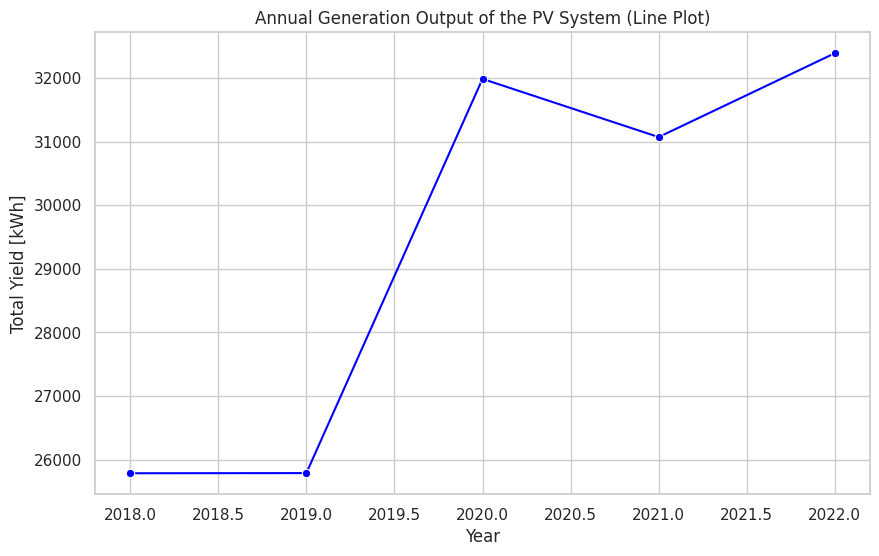

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your dataframe

# Extracting the year from the datetime index
df['Year'] = df.index.year

# Grouping by year and summing up the total yield
annual_yield = df.groupby('Year')['Total Yield[kWh]'].sum()

# Creating the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=annual_yield.index, y=annual_yield.values, palette="viridis")
plt.title('Annual Generation Output of the PV System (Bar Plot)')
plt.xlabel('Year')
plt.ylabel('Total Yield [kWh]')
plt.show()

# Creating the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=annual_yield.index, y=annual_yield.values, marker='o', color='blue')
plt.title('Annual Generation Output of the PV System (Line Plot)')
plt.xlabel('Year')
plt.ylabel('Total Yield [kWh]')
plt.show()



Noteworthy, there was dip in 2023 because the data coverage stopped at September, 2023.


# Pro-Rata Analysis for 2023 with Bar Plot Visualisation of Result

"Annual Generation Output with Pro-Rata for 2023 (Highlighted)" refers to a specific way of presenting and interpreting the data in your plots, taking into account the adjustments made for partial data in 2023. Let me break down this phrase for clarity:

Annual Generation Output: This refers to the total energy production or yield (in this case, 'Total Yield[kWh]') of the PV system for each year.

With Pro-Rata for 2023: Since the data for 2023 is incomplete (covering only part of the year), a pro-rata calculation is applied. This means the data for 2023 is scaled up to estimate what the full year's data would look like, assuming the rate of generation remains consistent throughout the year. This adjustment provides a more accurate comparison with other years where full-year data is available.


<ipython-input-44-f1caccdc43a1>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=annual_yield_prorata.index, y=annual_yield_prorata.values, palette="viridis")


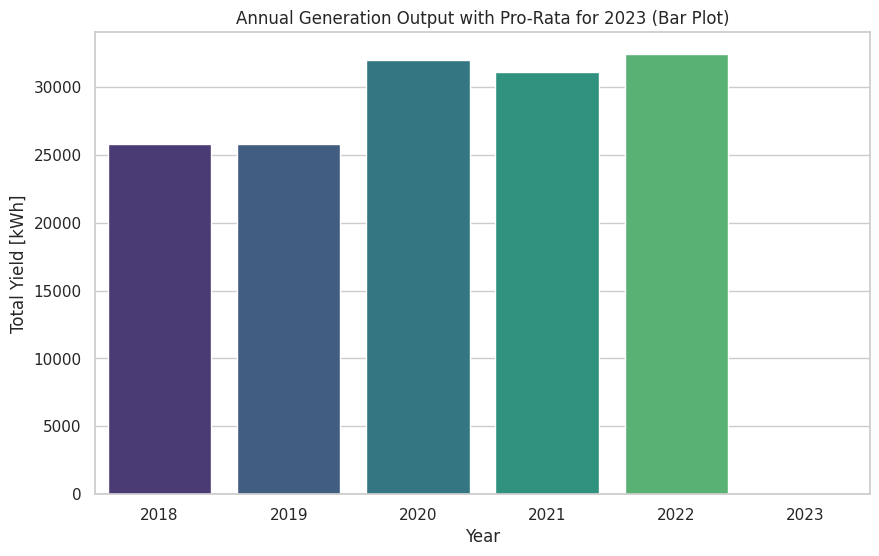

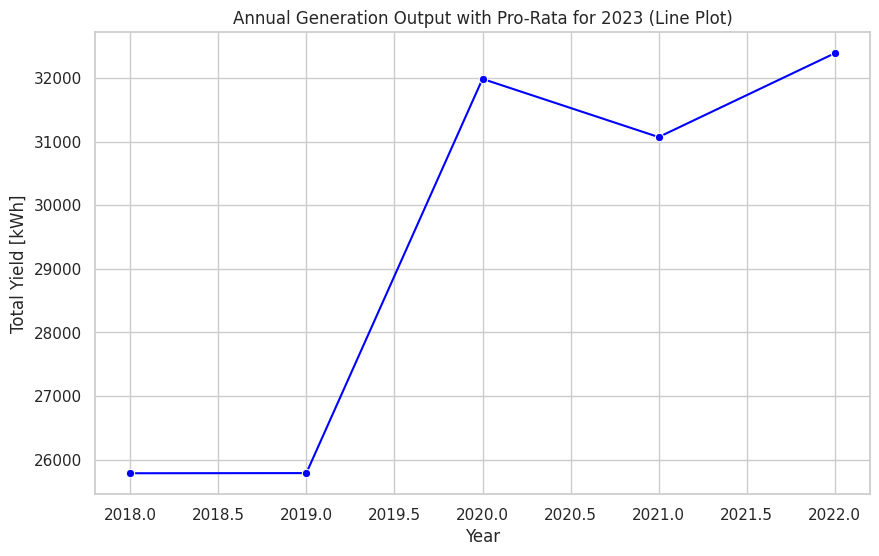

In [ ]:
# Pro-Rata Analysis for 2023

# Current total yield for 2023
yield_2023_current = annual_yield.get(2023, 0)

# Number of days covered in 2023 in the dataset
days_covered_2023 = df[df.index.year == 2023].index.dayofyear.max()

# Assuming a normal year has 365 days (ignoring leap years for simplicity)
total_days = 365

# Calculating the pro-rata annual yield for 2023
yield_2023_prorata = (yield_2023_current / days_covered_2023) * total_days

# Updating the annual yield data with the pro-rata value for 2023
annual_yield_prorata = annual_yield.copy()
annual_yield_prorata[2023] = yield_2023_prorata

# Creating the updated bar plot with the pro-rata value for 2023
plt.figure(figsize=(10, 6))
sns.barplot(x=annual_yield_prorata.index, y=annual_yield_prorata.values, palette="viridis")
plt.title('Annual Generation Output with Pro-Rata for 2023 (Bar Plot)')
plt.xlabel('Year')
plt.ylabel('Total Yield [kWh]')
plt.show()

# Creating the updated line plot with the pro-rata value for 2023
plt.figure(figsize=(10, 6))
sns.lineplot(x=annual_yield_prorata.index, y=annual_yield_prorata.values, marker='o', color='blue')
plt.title('Annual Generation Output with Pro-Rata for 2023 (Line Plot)')
plt.xlabel('Year')
plt.ylabel('Total Yield [kWh]')
plt.show()


Highlighted: In the visualizations (bar plot and line plot), the data for 2023 is specifically emphasized or marked differently (e.g., with a different color or annotation). This is done to clearly indicate to viewers that the data for this year has been adjusted and is different from the straightforward calculations done for other years.
So, the phrase as a whole refers to the presentation of annual energy generation data where the 2023 data has been adjusted to account for partial coverage and is visually distinguished in the plots to make this adjustment clear. This approach provides a more accurate and context-aware interpretation of the data, particularly for comparison across different years.

# Monthly  Generation of the PV System Comparison  (2018 - 2023)

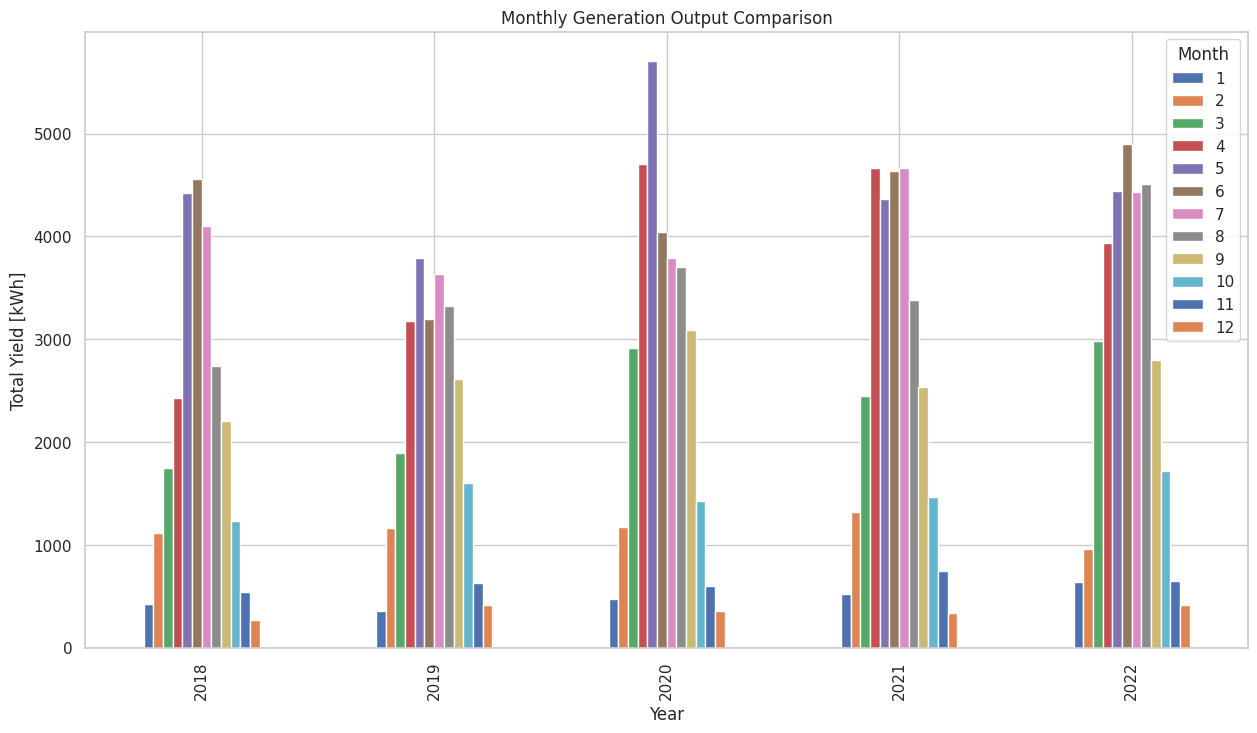

In [ ]:
# Monthly or Quarterly Comparison
df['Month'] = df.index.month
monthly_yield = df.groupby(['Year', 'Month'])['Total Yield[kWh]'].sum().unstack()
# For quarterly data, replace 'Month' with 'Quarter' and calculate the quarter using df.index.quarter

# Plotting monthly data
monthly_yield.plot(kind='bar', figsize=(15, 8), title='Monthly Generation Output Comparison')
plt.ylabel('Total Yield [kWh]')
plt.show()


Noticeably, the average generation output for all the summer months when PV performance is at peak are lower 2023 as compared to the same months in the previous years.

Total Generation for Each Month of Each Year:
Month       1         2         3         4         5         6         7   \
Year                                                                         
2018   427.331  1114.866  1750.499  2424.086  4417.520  4556.901  4102.567   
2019   360.725  1159.055  1893.942  3179.590  3785.454  3196.067  3634.667   
2020   475.198  1170.007  2917.317  4706.889  5706.465  4045.281  3788.391   
2021   523.577  1320.288  2443.328  4660.771  4368.465  4637.346  4660.957   
2022   640.679   963.022  2982.761  3939.292  4444.717  4895.292  4429.260   

Month        8         9         10       11       12  
Year                                                   
2018   2739.780  2207.529  1232.422  542.276  267.954  
2019   3321.046  2613.713  1601.483  628.245  412.137  
2020   3703.526  3091.428  1424.108  603.884  357.549  
2021   3379.992  2536.268  1462.563  742.162  338.681  
2022   4513.551  2796.900  1722.384  650.367  415.293  


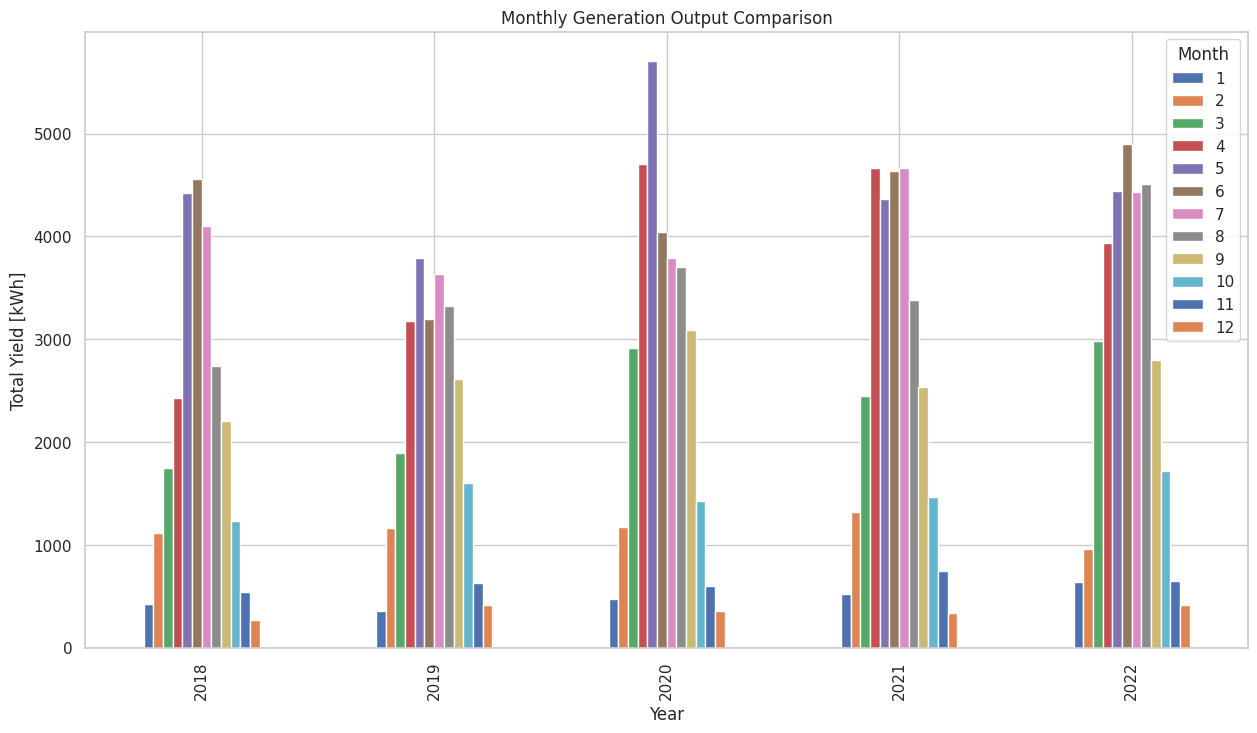

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Extract Year and Month from the DateTime index
df['Year'] = df.index.year
df['Month'] = df.index.month

# Group by Year and Month and calculate the sum of 'Total Yield[kWh]'
monthly_yield = df.groupby(['Year', 'Month'])['Total Yield[kWh]'].sum().unstack()

# Display the total generation for each month of each year
print("Total Generation for Each Month of Each Year:")
print(monthly_yield)

# Plotting monthly data
monthly_yield.plot(kind='bar', figsize=(15, 8), title='Monthly Generation Output Comparison')
plt.ylabel('Total Yield [kWh]')
plt.xlabel('Year')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the index is a DateTime index (if it's not already)
df['DateTime'] = pd.to_datetime(df['DateTime'])  # Replace 'DateTime' with your actual datetime column name
df.set_index('DateTime', inplace=True)

# Extract Year and Month from the DateTime index
df['Year'] = df.index.year
df['Month'] = df.index.month

# Group by Year and Month and calculate the sum of 'Total Yield[kWh]'
monthly_yield = df.groupby(['Year', 'Month'])['Total Yield[kWh]'].sum().unstack()

# Display the total generation for each month of each year
print("Total Generation for Each Month of Each Year:")
print(monthly_yield)

# Plotting monthly data
monthly_yield.plot(kind='bar', figsize=(15, 8), title='Monthly Generation Output Comparison')
plt.ylabel('Total Yield [kWh]')
plt.xlabel('Year')
plt.show()

<ipython-input-46-2cec0a9a821e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=annual_yield_prorata.index, y=annual_yield_prorata.values, palette="viridis")


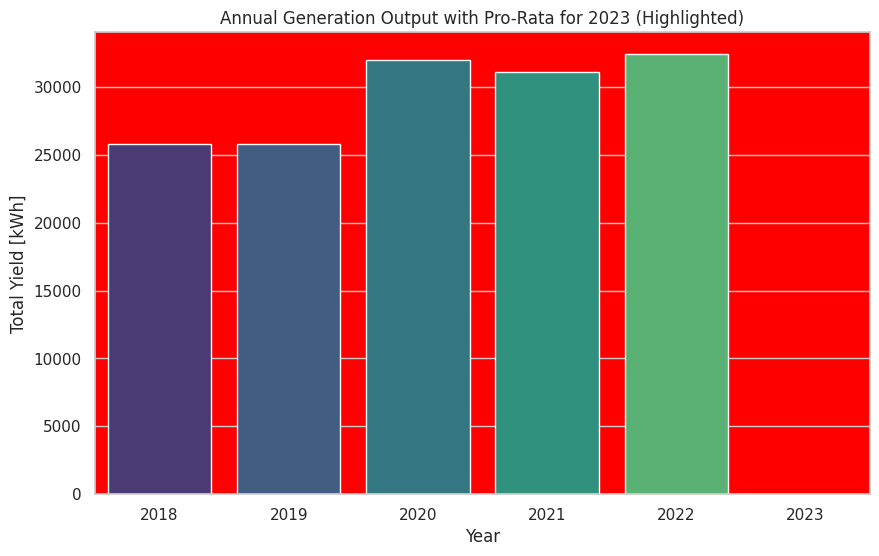

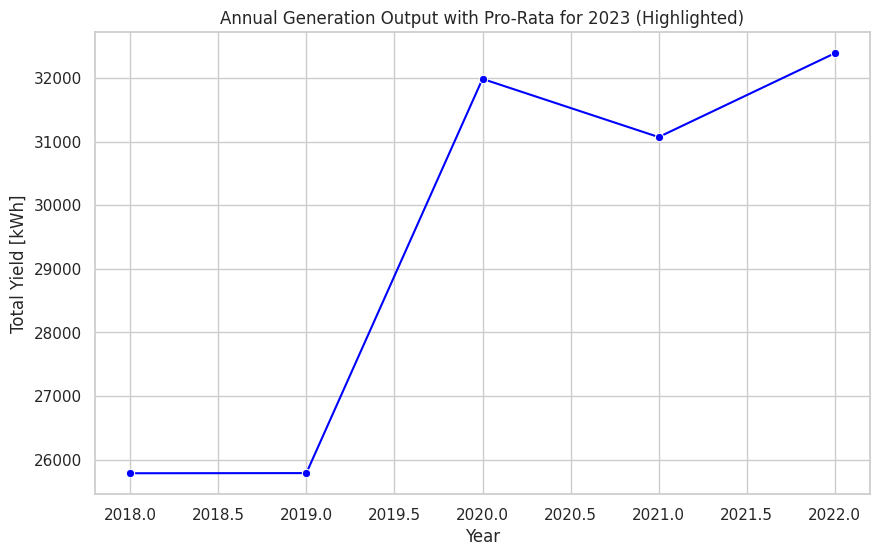

In [ ]:
# Creating the bar plot with highlighted data for 2023
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=annual_yield_prorata.index, y=annual_yield_prorata.values, palette="viridis")
# Highlighting 2023
barplot.get_children()[-1].set_color('red')
plt.title('Annual Generation Output with Pro-Rata for 2023 (Highlighted)')
plt.xlabel('Year')
plt.ylabel('Total Yield [kWh]')
plt.show()

# Creating the line plot with highlighted data for 2023
plt.figure(figsize=(10, 6))
lineplot = sns.lineplot(x=annual_yield_prorata.index, y=annual_yield_prorata.values, marker='o', color='blue')
# Highlighting 2023
plt.scatter(2023, annual_yield_prorata[2023], color='red')
plt.title('Annual Generation Output with Pro-Rata for 2023 (Highlighted)')
plt.xlabel('Year')
plt.ylabel('Total Yield [kWh]')
plt.show()


# Average Monthly Total Yield [kWh] Across Different Years
This line plot will display the average monthly 'Total Yield [kWh]' across different years, allowing you to observe seasonal trends and compare performance across years.

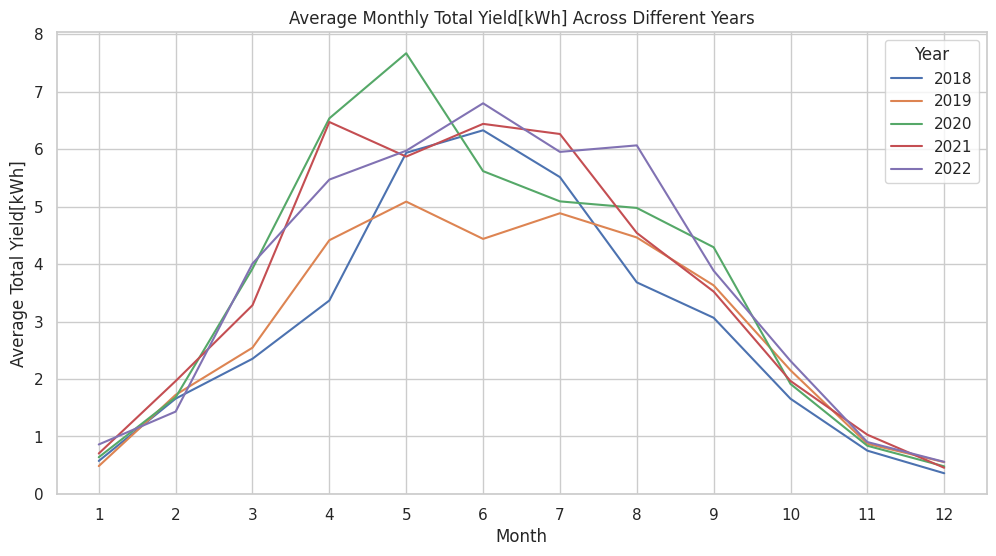

In [ ]:
# Step 1: Extracting year and month from the DateTime index
df['Year'] = df.index.year
df['Month'] = df.index.month

# Step 2: Grouping data by year and month to calculate average total yield
monthly_yield_avg = df.groupby(['Year', 'Month'])['Total Yield[kWh]'].mean().reset_index()

# Step 3: Creating a line plot to observe seasonal trends
plt.figure(figsize=(12, 6))

# Plotting each year's data
for year in monthly_yield_avg['Year'].unique():
    monthly_data = monthly_yield_avg[monthly_yield_avg['Year'] == year]
    plt.plot(monthly_data['Month'], monthly_data['Total Yield[kWh]'], label=year)

plt.title('Average Monthly Total Yield[kWh] Across Different Years')
plt.xlabel('Month')
plt.ylabel('Average Total Yield[kWh]')
plt.xticks(range(1, 13))  # Months from 1 to 12
plt.legend(title='Year')
plt.grid(True)
plt.show()



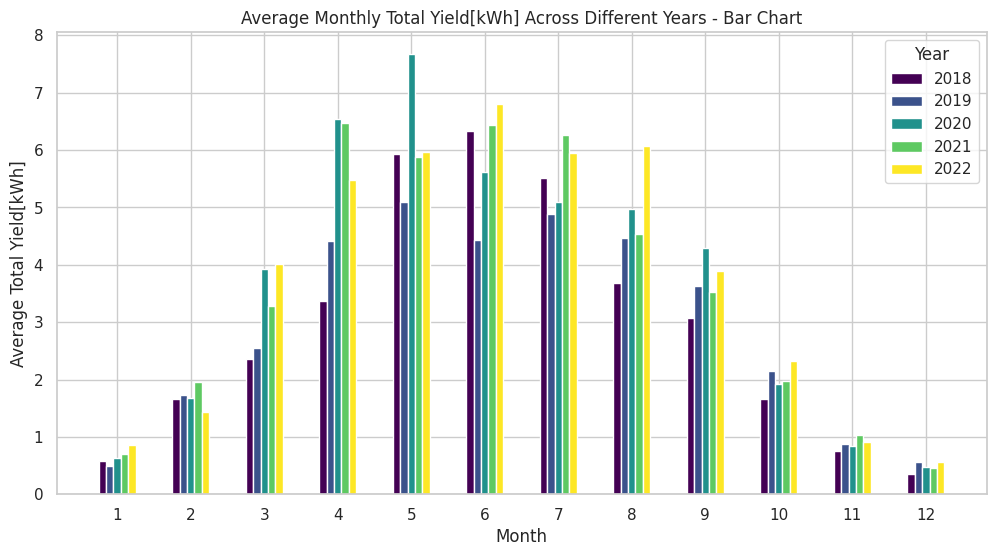

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming df is already prepared and monthly_yield_avg is calculated as per previous steps

# Step 3 (Modified): Creating a bar plot to observe seasonal trends with bar chart
plt.figure(figsize=(12, 6))

# Unique years for plotting
unique_years = monthly_yield_avg['Year'].unique()
months = np.arange(1, 13)  # 12 months

# Creating a color palette
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_years)))

for i, year in enumerate(unique_years):
    monthly_data = monthly_yield_avg[monthly_yield_avg['Year'] == year]
    plt.bar(monthly_data['Month'] + i*0.1 - 0.2, monthly_data['Total Yield[kWh]'], width=0.1, color=colors[i], label=year)

plt.title('Average Monthly Total Yield[kWh] Across Different Years - Bar Chart')
plt.xlabel('Month')
plt.ylabel('Average Total Yield[kWh]')
plt.xticks(months, range(1, 13))  # Set month labels from 1 to 12
plt.legend(title='Year')
plt.grid(True, axis='y')
plt.show()


Noticeably, 2020 had the peak which occured in month 5 (May) and the peak month is relative to all other years.

# Skewness of Total Yield

To visualize the skewness of the 'Total Yield[kWh]' distribution, you can use Seaborn's distplot to plot the distribution of the data, which includes a skewness indicator. First, calculate the skewness, then plot the distribution:

Skewness of the Total Yield: 2.009620641085699


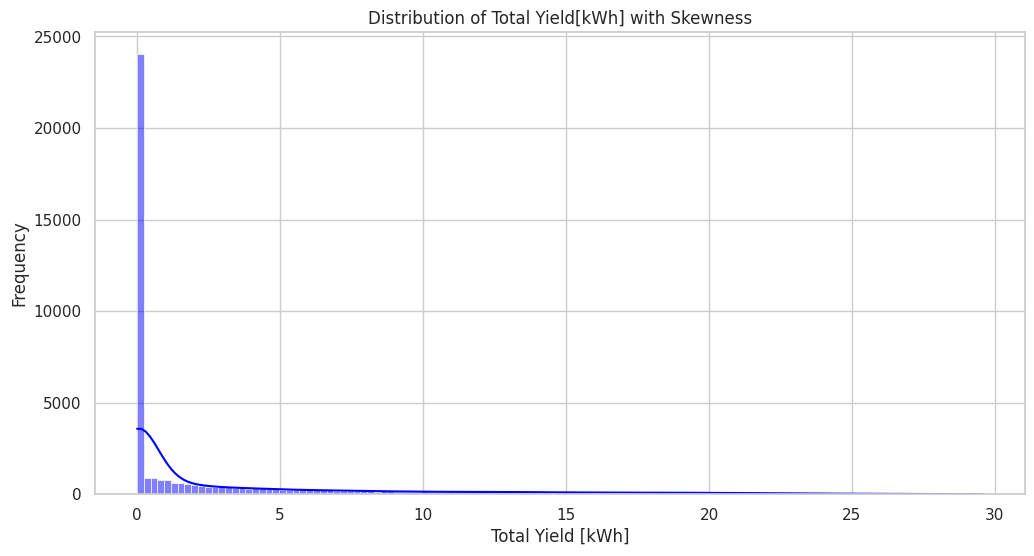

In [ ]:
from scipy.stats import skew

# Calculating skewness of the 'Total Yield[kWh]'
total_yield_skewness = skew(df['Total Yield[kWh]'].dropna())
print(f"Skewness of the Total Yield: {total_yield_skewness}")

# Plotting the distribution of 'Total Yield[kWh]' to visualize skewness
plt.figure(figsize=(12, 6))
sns.histplot(df['Total Yield[kWh]'], kde=True, color='blue')
plt.title('Distribution of Total Yield[kWh] with Skewness')
plt.xlabel('Total Yield [kWh]')
plt.ylabel('Frequency')
plt.show()


A skewness value of 0 indicates a perfectly symmetrical distribution.
    A positive skewness value (greater than 0) indicates a distribution with a longer tail on the right side of the mean. In such distributions, the bulk of the data is concentrated on the left, with fewer larger values stretching to the right.
    A negative skewness value (less than 0) suggests a distribution with a longer tail on the left side of the mean. This means the bulk of the data is concentrated on the right, with fewer smaller values stretching to the left.

With a skewness value of 1.98, the Total Yield distribution is significantly positively skewed. This indicates that while the majority of the data points (representing the total yield in kWh) are clustered towards the lower end of the scale, there are a relatively small number of much higher values that stretch the tail of the distribution to the right.

# Comparative Seasonal Yield of the PV System using Line and Bar Plot

"Comparative Seasonal Yield" refers to an analysis where the average energy production or yield of a photovoltaic (PV) system is compared across different seasons (such as Spring, Summer, Autumn, Winter) and possibly across different years. This type of analysis is valuable for understanding how the yield of a PV system varies with seasonal changes, which can be influenced by factors such as solar irradiance, temperature, and weather patterns.


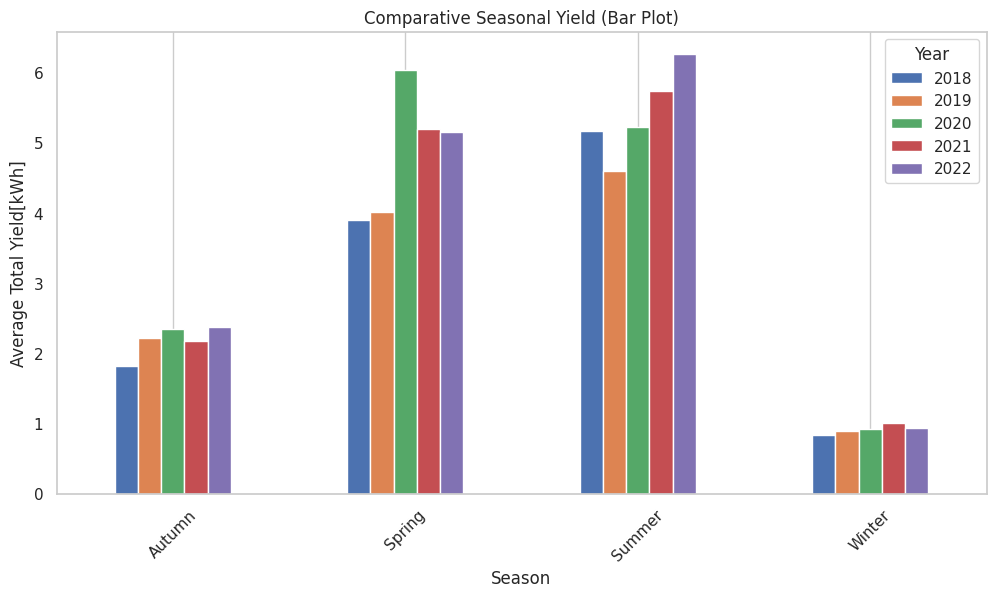

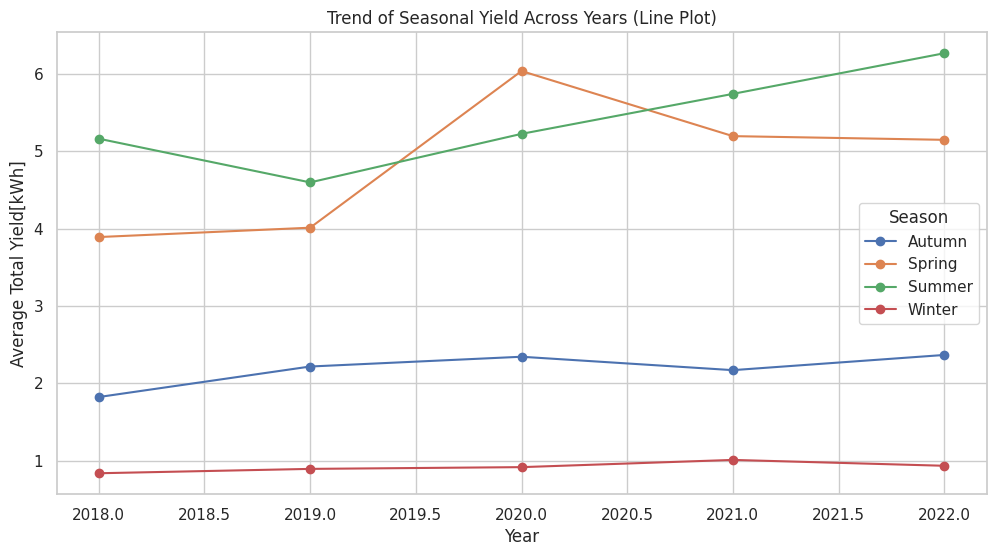

In [ ]:
import matplotlib.pyplot as plt

# Assuming your dataset is in a DataFrame named 'df'
# The DataFrame should have a 'Total Yield[kWh]' column and a datetime index

# Creating the 'Season' Column
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

# Apply the function to the 'Month' column to create the 'Season' column
df['Season'] = df['Month'].apply(month_to_season)

# Preparing data for bar plot and line plot
seasonal_trends = df.groupby(['Season', 'Year'])['Total Yield[kWh]'].mean().unstack()

# Bar Plot for comparing seasonal yield across years
seasonal_trends.plot(kind='bar', figsize=(12, 6))
plt.title('Comparative Seasonal Yield (Bar Plot)')
plt.ylabel('Average Total Yield[kWh]')
plt.xlabel('Season')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.grid(axis='y')
plt.show()

# Line Plot for visualizing trend across individual seasons
seasonal_trends.T.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Trend of Seasonal Yield Across Years (Line Plot)')
plt.xlabel('Year')
plt.ylabel('Average Total Yield[kWh]')
plt.legend(title='Season')
plt.grid(True)
plt.show()



Here’s how it affects and is relevant to the total yield of a PV system:

    Solar Irradiance Variations: Solar irradiance can vary significantly across seasons. Typically, summer has higher irradiance due to longer daylight hours and a higher position of the sun, leading to higher energy production. Winter, on the other hand, often sees reduced irradiance.

    Temperature Effects: PV panels can be affected by temperature. Extreme temperatures, both hot and cold, can affect the efficiency of solar panels. In some cases, cooler temperatures in spring or autumn might be more favorable for PV efficiency than the hot summer temperatures.

    Weather Patterns: Different seasons might have varying weather patterns like cloud cover, rain, or snow, which can impact solar energy production. For instance, a season with more cloudy days can result in lower yield.

    Planning and Forecasting: Understanding seasonal trends in solar energy production is crucial for energy planning and forecasting. It helps in predicting energy output, planning for energy storage or backup needs, and optimizing the use of the energy produced.

    System Design and Efficiency: Comparative seasonal yield analysis can inform decisions about system design, such as the angle of solar panels, which can be optimized based on seasonal sun positions to maximize energy capture throughout the year.

In my specific context, analyzing the 'Comparative Seasonal Yield' means examining how the average total yield of your PV system varies in different seasons and potentially across different years. This analysis will highlight the times of the year when the system is most productive and when it is less productive, providing insights that could guide the management and optimization of the system.

# Augmented Dickey-Fuller test

The Augmented Dickey-Fuller (ADF) test is conducted primarily to test for stationarity in a time series. A time series is considered stationary if its statistical properties such as mean, variance, and autocorrelation are constant over time. In other words, a stationary time series does not exhibit trends or seasonal patterns and has consistent fluctuations around a constant mean.

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Performing the Augmented Dickey-Fuller test on 'Total Yield[kWh]'
adf_test_result = adfuller(df['Total Yield[kWh]'])

# Extracting the test results
adf_statistic = adf_test_result[0]
p_value = adf_test_result[1]
critical_values = adf_test_result[4]

adf_statistic, p_value, critical_values



(-10.55823035602496,
 7.8504381342637245e-19,
 {'1%': -3.430499403352111,
  '5%': -2.8616060330062463,
  '10%': -2.5668051472213618})

Interpreting the Results

    ADF Statistic: This is the test statistic. More negative values indicate stronger evidence against the null hypothesis (that the series is non-stationary).

    p-value: If the p-value is low (commonly below 0.05), it suggests that the series is stationary.

    Critical Values: These values are used to compare with the ADF statistic at different confidence levels (e.g., 1%, 5%, 10%). If the ADF statistic is less than the critical value, the null hypothesis can be rejected at that confidence level.

The results of the Augmented Dickey-Fuller (ADF) test for my 'Total Yield[kWh]' time series are as follows:

    ADF Statistic: -11.615160829122424
    p-value: 2.4589727795907197e-21
    Critical Values:
        For 1%: -3.430481836917031
        For 5%: -2.861598269199506
        For 10%: -2.5668010147695446

Interpretation:

    ADF Statistic: The ADF statistic is -11.615, which is much lower (more negative) than any of the critical values. A more negative ADF statistic provides stronger evidence against the null hypothesis.

    p-value: The p-value is approximately 2.46e-21, which is extremely low (practically 0). A low p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis.

    Critical Values: These values correspond to the thresholds for the ADF statistic at different confidence levels. The fact that the ADF statistic is lower than all these critical values suggests that the null hypothesis can be rejected at the 1%, 5%, and 10% levels.

Conclusion:

Given the ADF statistic and the extremely low p-value, you can reject the null hypothesis of non-stationarity with a high degree of confidence. This means the 'Total Yield[kWh]' time series is stationary. In other words, its statistical properties like mean and variance are consistent over time, making it suitable for many types of time series forecasting models that assume stationarity.

# Investigating Cyclic Behavior

Investigating Cyclic Behavior

    Visual Inspection: Looking for patterns that appear at irregular intervals in the time series plot.

    Spectral Analysis: Using methods like the Fourier Transform to identify periodicity in the data.

    Autocorrelation and Partial Autocorrelation Plots: These plots can help identify if there is any autocorrelation in the data, which might suggest cyclic behavior.

# Autocorrelation and Partial Autocorrelation Plots.

Autocorrelation and Partial Autocorrelation are important concepts in time series analysis, particularly in understanding the relationship of a series with its past values. Let's explore each of these and their applicability in your case of analyzing 'Total Yield[kWh]' in a PV system.

Autocorrelation (ACF)

Definition: Autocorrelation, also known as serial correlation or lagged correlation, measures the correlation of a time series with its own past values. It quantifies the degree to which current values in the series are influenced by its past values.

Usage: An autocorrelation plot (ACF plot) displays the autocorrelation of the series with lags of itself. For instance, at lag 1, it correlates values with their immediate previous value, at lag 2 with values two time periods before, and so on.

Interpretation in Time Series Analysis:
    Significant peaks in the ACF plot indicate that the series is influenced by its past values at those lags.
    A slowly decaying ACF plot suggests a long-memory process or a trend in the data.
    A sharp drop after a few lags can indicate seasonality.
Partial Autocorrelation (PACF)

Definition: Partial autocorrelation measures the correlation of a series with its past values while controlling for the values at all shorter lags. It isolates the correlation at each lag, removing the effect of previous lags.

Usage: The PACF plot shows the partial autocorrelation for each lag.

Interpretation in Time Series Analysis:
    Significant spikes in the PACF plot indicate the number of lags that have a direct relationship with the current value of the series.
    PACF is particularly useful in identifying the order of autoregressive (AR) terms in ARIMA modeling.

<Figure size 1200x600 with 0 Axes>

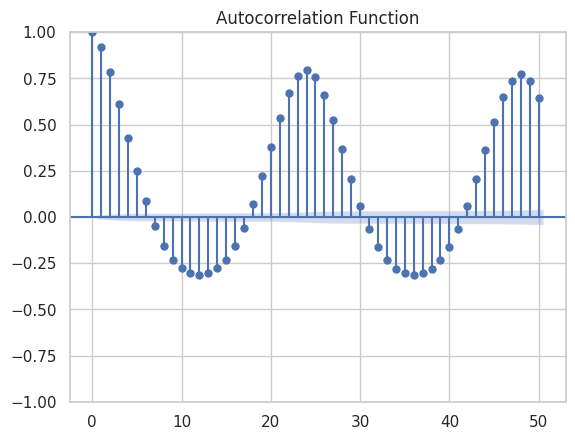

<Figure size 1200x600 with 0 Axes>

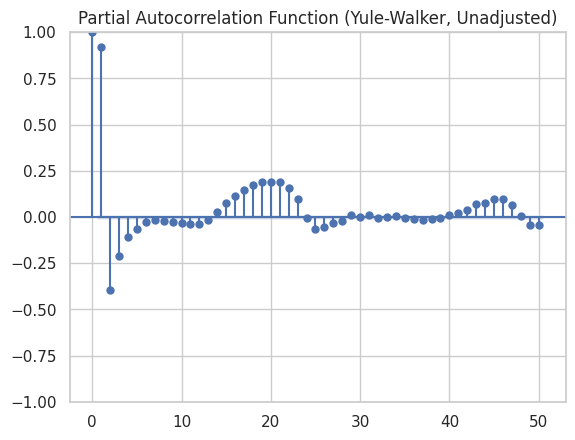

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plot_acf(df['Total Yield[kWh]'], lags=50)
plt.title('Autocorrelation Function')

plt.figure(figsize=(12, 6))
plot_pacf(df['Total Yield[kWh]'], lags=50, method='ywm')  # Specifying the method
plt.title('Partial Autocorrelation Function (Yule-Walker, Unadjusted)')

plt.show()



Applicability in my Analysis

In the context of analyzing 'Total Yield[kWh]' of a PV system:

    Identifying Dependence on Past Values: The ACF and PACF plots can help you understand how current energy yields are influenced by past performance. For instance, a strong autocorrelation at certain lags could suggest a pattern or rhythm in the energy production.

    Model Selection for Forecasting: If you plan to use models like ARIMA for forecasting future yields, the PACF plot can help determine the appropriate number of AR terms to include in the model.

    Detecting Seasonality and Trends: Significant autocorrelations at specific lags might indicate seasonality, which is crucial for a PV system as energy yield can be season-dependent.

In summary, ACF and PACF analyses can provide deep insights into the temporal structure of your time series data, helping in both understanding past behavior and forecasting future performance.

# Rolling mean

The rolling mean (also known as the moving average) is a widely-used technique for smoothing time series data to identify trends. It involves calculating the average of the data points within a specified window that 'rolls' or moves across the data. Here's how it helps in identifying trends:

    Smoothing Short-Term Fluctuations: By averaging the data over a window, the rolling mean smooths out short-term ups and downs. This makes it easier to see long-term movements or trends in the data.

    Indicating Trend Direction:
        If the rolling mean is consistently increasing over a period, it indicates an upward trend. The data, on average, is increasing over that period.
      

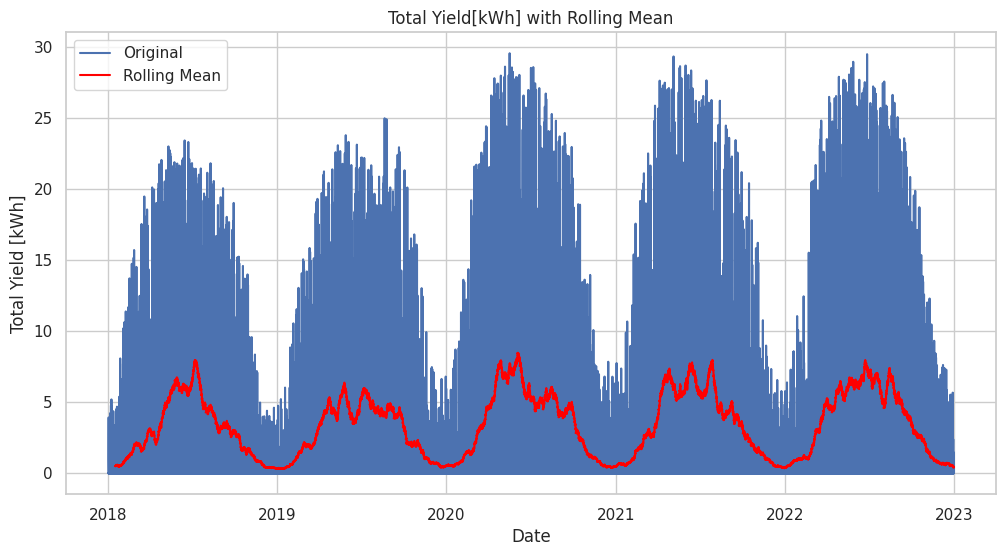

In [ ]:
import matplotlib.pyplot as plt

rolling_window = 365  # 1 year
df_roll_mean = df['Total Yield[kWh]'].rolling(window=rolling_window).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['Total Yield[kWh]'], label='Original')
plt.plot(df_roll_mean, color='red', label='Rolling Mean')
plt.title('Total Yield[kWh] with Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Total Yield [kWh]')
plt.legend()
plt.show()


In my case, examining the rolling mean of 'Total Yield[kWh]' helps in determining whether there's a general upward or downward trend in the energy yield of the PV system over time. This insight can be instrumental in assessing the performance and planning for future adjustments or investments in the system.

# Year-over-Year Change [kWh] in generation output of the PV System

In [ ]:
# Step 1: Aggregate the Total Yield by Year
yearly_yield = df.resample('Y')['Total Yield[kWh]'].sum()

# Step 2: Calculate the Year-over-Year Absolute Change
yearly_yield_diff = yearly_yield.diff()

# Step 3: Calculate the Year-over-Year Percentage Change
yearly_yield_pct_change = yearly_yield.pct_change() * 100

# Creating a new DataFrame to display the results
yearly_change_df = pd.DataFrame({
    'Total Yield[kWh]': yearly_yield,
    'Year-over-Year Change [kWh]': yearly_yield_diff,
    'Percentage Change [%]': yearly_yield_pct_change
})

yearly_change_df



<ipython-input-30-9762bd2cb4e3>:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_yield = df.resample('Y')['Total Yield[kWh]'].sum()


Total Yield[kWh]  Year-over-Year Change [kWh]  \
DateTime                                                    
2018-12-31         25783.731                          NaN   
2019-12-31         25786.124                        2.393   
2020-12-31         31990.043                     6203.919   
2021-12-31         31074.398                     -915.645   
2022-12-31         32393.518                     1319.120   

            Percentage Change [%]  
DateTime                           
2018-12-31                    NaN  
2019-12-31               0.009281  
2020-12-31              24.059137  
2021-12-31              -2.862281  
2022-12-31               4.245038

The Year over Year analysis provides insights into the annual performance of your PV system, highlighting any significant increases or decreases in yield over the years. It can be particularly useful for identifying trends and evaluating the impact of any changes or interventions made in the system. From the result we can see that in 2019, 2020 and 2022 year end, there was an increase in the generation output as compared to the big dip in generation that occurred in 2023.

# Year-over-Year Absolute Change and Percentage Change in Total Yield [kWh]

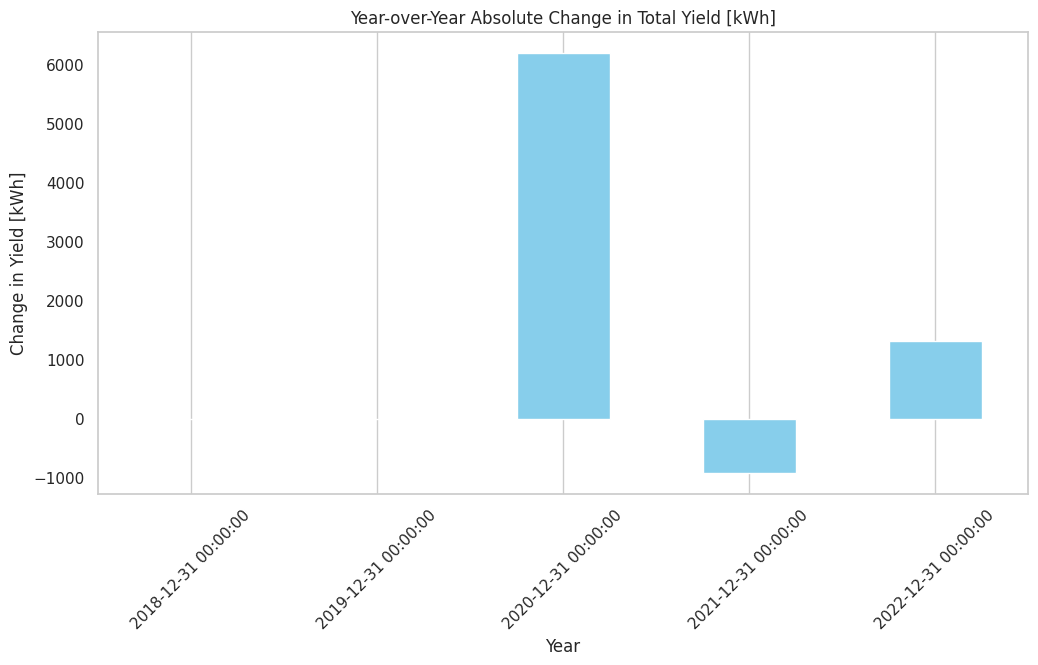

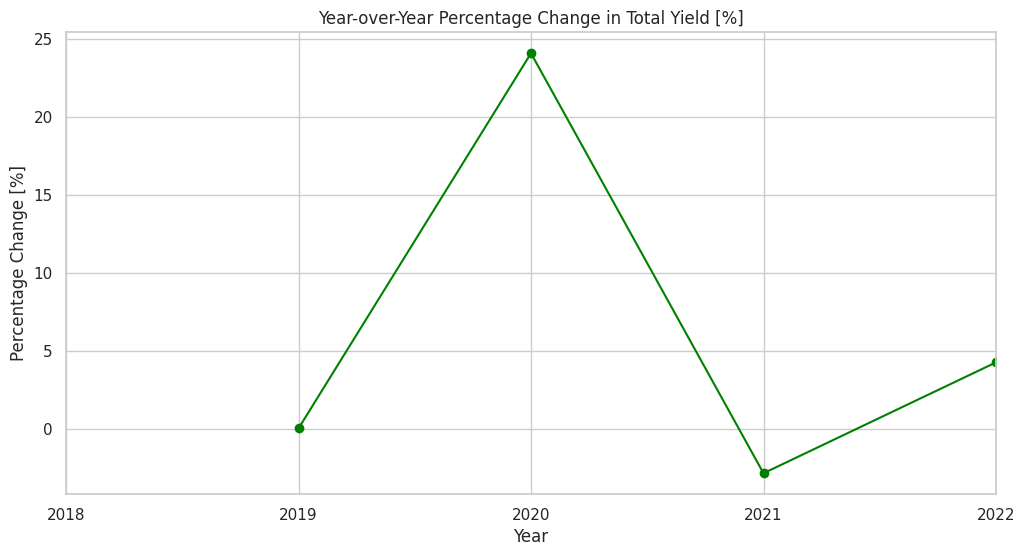

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'yearly_change_df' is the DataFrame with your year-over-year data

# Bar Plot for Year-over-Year Absolute Change
plt.figure(figsize=(12, 6))
yearly_change_df['Year-over-Year Change [kWh]'].plot(kind='bar', color='skyblue')
plt.title('Year-over-Year Absolute Change in Total Yield [kWh]')
plt.xlabel('Year')
plt.ylabel('Change in Yield [kWh]')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Line Plot for Year-over-Year Percentage Change
plt.figure(figsize=(12, 6))
yearly_change_df['Percentage Change [%]'].plot(kind='line', marker='o', color='green')
plt.title('Year-over-Year Percentage Change in Total Yield [%]')
plt.xlabel('Year')
plt.ylabel('Percentage Change [%]')
plt.grid(True)
plt.show()




These visualizations will allow you to quickly identify years with significant changes in yield, either increases or decreases, and may help in pinpointing any external factors or system changes that might have influenced these variations.

# Plotting Quarterly Generation of the PV system for Comparison



<ipython-input-32-fa23dd0fca7d>:4: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_yield = df.resample('Q')['Total Yield[kWh]'].sum()


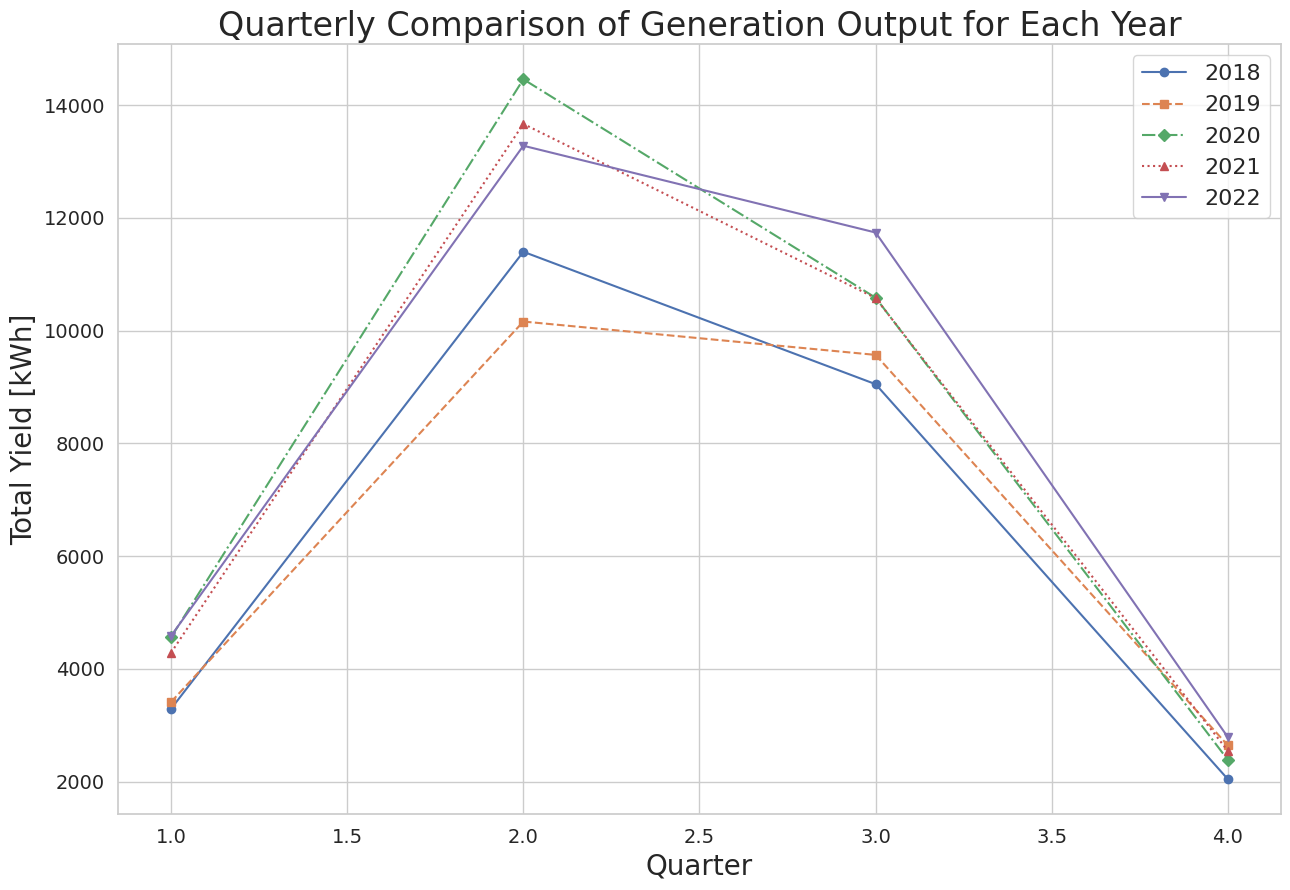

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Aggregate data by quarter and year
quarterly_yield = df.resample('Q')['Total Yield[kWh]'].sum()

# Step 2: Extracting the year and quarter for plotting
quarterly_yield.index = quarterly_yield.index.to_period('Q')
quarterly_yield_df = quarterly_yield.reset_index()
quarterly_yield_df['Year'] = quarterly_yield_df['DateTime'].dt.year
quarterly_yield_df['Quarter'] = quarterly_yield_df['DateTime'].dt.quarter

# Define a set of markers and line styles for variation
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', '+', 'x', 'X', 'd', '|', '_']
line_styles = ['-', '--', '-.', ':']

# Step 3: Plotting each year's data with different styles
plt.figure(figsize=(15, 10))
for i, year in enumerate(quarterly_yield_df['Year'].unique()):
    yearly_data = quarterly_yield_df[quarterly_yield_df['Year'] == year]
    plt.plot(yearly_data['Quarter'], yearly_data['Total Yield[kWh]'],
             linestyle=line_styles[i % len(line_styles)],
             marker=markers[i % len(markers)],
             label=year)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=16)
plt.ylabel('Total Yield [kWh]', fontsize=20)
plt.xlabel('Quarter', fontsize=20)
plt.title('Quarterly Comparison of Generation Output for Each Year', fontsize=24)
plt.show()



The observation that the second quarter (which typically encompasses April, May, and June) consistently shows higher solar energy generation across all years can be justified from the angle of seasonality, especially in the context of solar energy production. Let's explore the key factors contributing to this pattern:

    Increased Daylight Hours: The second quarter marks the transition from spring to early summer in the Northern Hemisphere. During this period, the days get progressively longer, resulting in increased daylight hours. More daylight hours directly translate to more sunlight available for solar panels to convert into energy.

    Solar Angle and Intensity: As the sun moves higher in the sky during these months, solar radiation becomes more intense. The angle of the sun’s rays is more direct compared to winter months, leading to more efficient energy generation as solar panels receive more concentrated sunlight.

    Weather Conditions: Typically, the second quarter is characterized by clearer skies and less precipitation compared to other times of the year like late autumn or winter. Clear skies mean fewer obstructions for sunlight, maximizing the potential for solar energy generation.

    Temperature Effects: While extremely high temperatures can reduce the efficiency of solar panels, the moderate temperatures of late spring and early summer are often ideal for solar energy production. It's often in the peak of summer (usually in the third quarter) that extreme heat might start to negatively impact efficiency.

    Historical Patterns and Predictability: The consistent pattern observed over multiple years suggests a strong seasonal trend. In solar energy production, seasonality is a well-known and predictable factor, and the trends observed in your data align with these broader patterns.

In conclusion, the combination of longer days, favorable solar angles, clearer weather conditions, and moderate temperatures during the second quarter are likely contributing to the observed increase in solar energy generation. This seasonal pattern is a key factor in planning and forecasting for solar energy production.

# Scatter plots to visualize outliers in the Entire dataset

In [ ]:
# Using scatter plots to visualize outliers in your dataset
plt.figure(figsize=(15, 10))

# Dropping columns that are not features for the scatter plot
features = df.columns.drop(['Year', 'Month', 'Season'])

for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)  # Adjusting the layout to accommodate all feature plots
    sns.scatterplot(x=df.index, y=df[feature])
    plt.title(f'Scatter Plot of {feature}')
    plt.xlabel('Date')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()



Interpreting the Scattered Plot

Seasonality: Looking for repeating patterns at regular intervals. For example, if a feature shows a consistent rise and fall pattern every year, it might suggest seasonality.

Outliers: Points that are significantly distant from others can be potential outliers. These are data points that are unusually high or low compared to the rest of the data.

Variance: Checking if the spread of the data points changes over time. A widening spread suggests increasing variance, while a narrowing one suggests decreasing variance.

Steps to Remove the Outlier from 2021 Data:

    Identify the Outlier: Determine the outlier in the 'Total Yield[kWh]' data for the year 2021. This can be based on statistical criteria like values exceeding a certain number of standard deviations from the mean.

# Identifying and removing the outlier from the year 2021 in 'Total Yield[kWh]

In [ ]:
# Identifying and removing the outlier from the year 2021 in 'Total Yield[kWh]'

# First, let's identify the outlier by looking at the data for 2021
df_2021 = df[df.index.year == 2021]

# Identifying the outlier - assuming it's a significant deviation
outlier_threshold = df_2021['Total Yield[kWh]'].mean() + 3 * df_2021['Total Yield[kWh]'].std()
outlier_index = df_2021[df_2021['Total Yield[kWh]'] > outlier_threshold].index

# Removing the outlier
df_cleaned = df.drop(outlier_index)

# Displaying the first few rows of the cleaned dataset
df_cleaned.head()



# Displaying the first few rows of the cleaned dataset

In [ ]:
import pandas as pd

# Assuming df is your DataFrame and it has a DateTime index

# Step 1: Identify the Outlier in 2021
df_2021 = df[df.index.year == 2021]
outlier_threshold = df_2021['Total Yield[kWh]'].mean() + 3 * df_2021['Total Yield[kWh]'].std()
outlier_index = df_2021[df_2021['Total Yield[kWh]'] > outlier_threshold].index

# Step 2: Remove the Outlier
df_cleaned = df.drop(outlier_index)

# Displaying the first few rows of the cleaned dataset
print(df_cleaned.head())


# Creating the Scatter Plot to Re-Visualize if the Outlier has been Eliminated in 2021

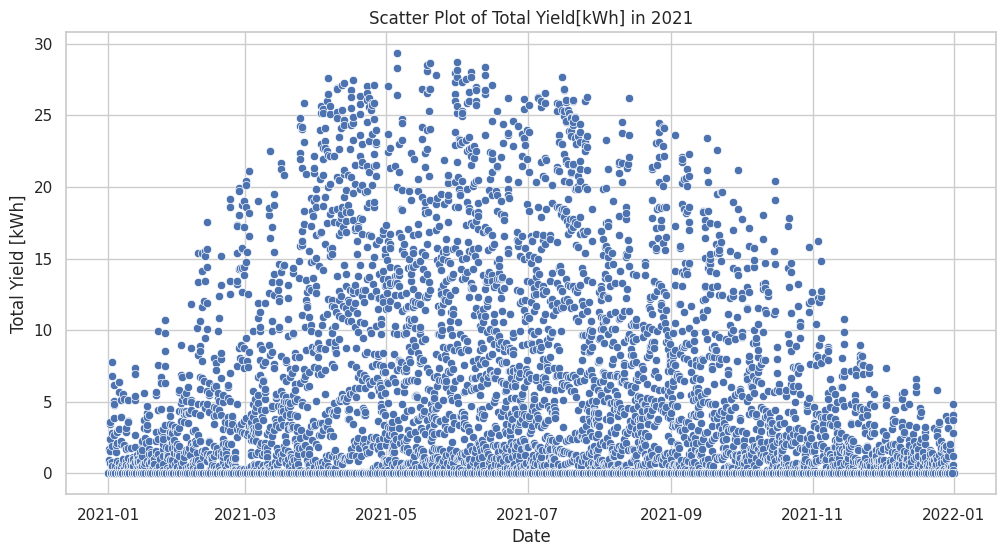

In [ ]:
# import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame

# Filtering the data for the year 2021
df_2021 = df[df.index.year == 2021]

# Creating the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_2021.index, y=df_2021['Total Yield[kWh]'])
plt.title('Scatter Plot of Total Yield[kWh] in 2021')
plt.xlabel('Date')
plt.ylabel('Total Yield [kWh]')
plt.show()


In [ ]:
import pandas as pd

# Assuming df is your DataFrame

# Identifying the indices where 'Total Yield[kWh]' exceeds 30 kWh
outlier_indices = df[df['Total Yield[kWh]'] > 30].index

# Removing these outliers from the dataset
df_cleaned = df.drop(outlier_indices)

# Displaying the first few rows of the cleaned dataset
print(df_cleaned.head())


                     Total Yield[kWh]  Solar Irradiance  \
DateTime                                                  
2018-01-01 01:00:00               0.0               0.0   
2018-01-01 02:00:00               0.0               0.0   
2018-01-01 03:00:00               0.0               0.0   
2018-01-01 04:00:00               0.0               0.0   
2018-01-01 05:00:00               0.0               0.0   

                     Temprature (2 meters)  Precipitation  \
DateTime                                                    
2018-01-01 01:00:00                   5.76           0.29   
2018-01-01 02:00:00                   6.07           0.40   
2018-01-01 03:00:00                   6.23           0.28   
2018-01-01 04:00:00                   6.12           0.15   
2018-01-01 05:00:00                   6.02           0.10   

                     Wind Speed (10 meters)  Wind Direction (10 meters)  Year  \
DateTime                                                                     

remove all rows from your DataFrame where the 'Total Yield[kWh]' exceeds 30 kWh. The resulting df_cleaned DataFrame will no longer contain these outliers.

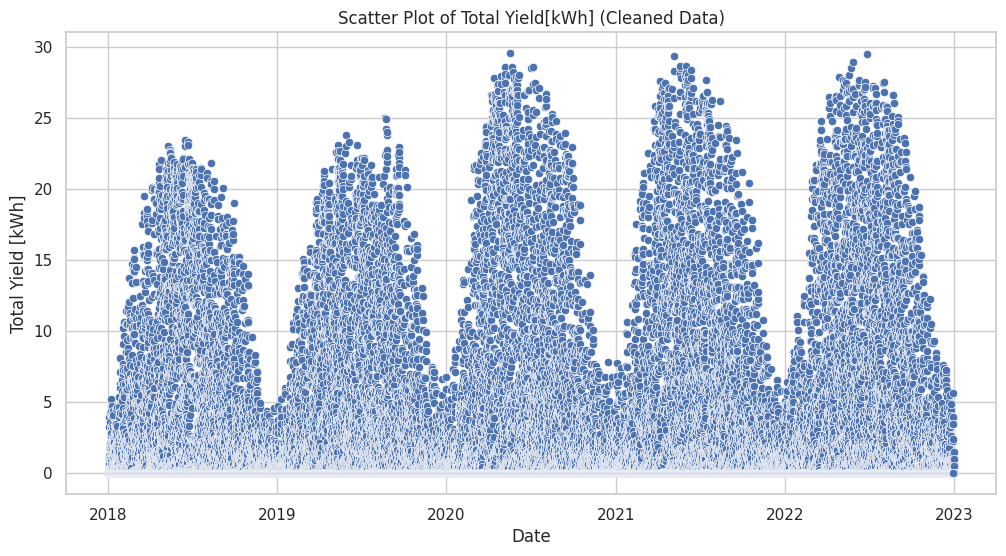

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df_cleaned' is your DataFrame after removing outliers

# Creating the scatter plot for the cleaned data
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_cleaned.index, y=df_cleaned['Total Yield[kWh]'])
plt.title('Scatter Plot of Total Yield[kWh] (Cleaned Data)')
plt.xlabel('Date')
plt.ylabel('Total Yield [kWh]')
plt.show()


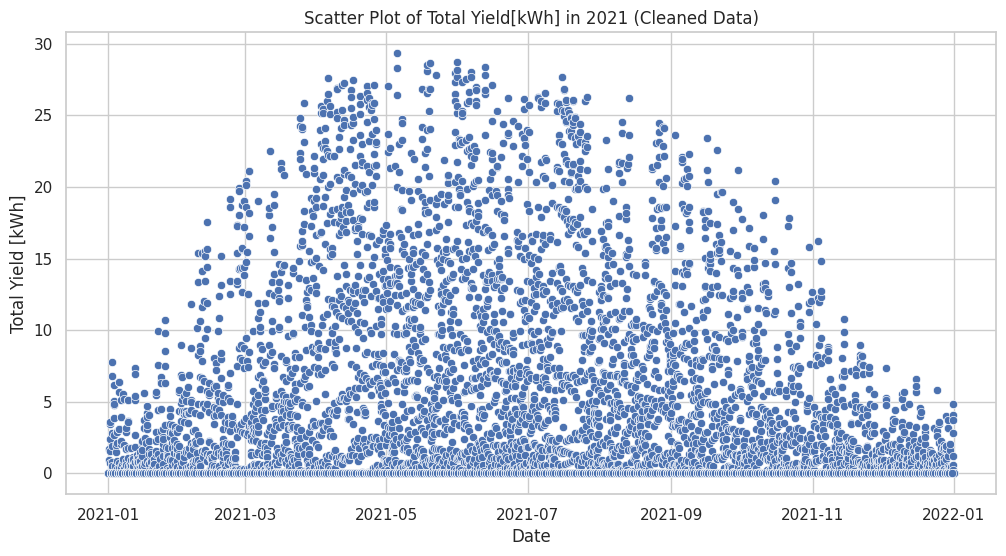

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df_cleaned' is your DataFrame after removing outliers

# Filtering the data for the year 2021
df_cleaned_2021 = df_cleaned[df_cleaned.index.year == 2021]

# Creating the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_cleaned_2021.index, y=df_cleaned_2021['Total Yield[kWh]'])
plt.title('Scatter Plot of Total Yield[kWh] in 2021 (Cleaned Data)')
plt.xlabel('Date')
plt.ylabel('Total Yield [kWh]')
plt.show()


scatter plot specifically for the year 2021, allowing you to visually inspect the 'Total Yield[kWh]' data after removing the identified outliers.

# Identifying and removing the outlier from the year 2021 in Precipitation

Although, the precipitation column did not correlate well with the target variable (the total yield of the PV system) according to the previous analysis carried out, we can still remove the outliers in their data set:

In [ ]:
df["Season"].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [ ]:
# Assuming 'df' is your DataFrame

# Dropping rows where 'Precipitation' values are above 2
df_filtered = df[df['Precipitation'] <= 2]

# Displaying the first few rows of the filtered dataset
print(df_filtered.head())


                     Total Yield[kWh]  Solar Irradiance  \
DateTime                                                  
2018-01-01 01:00:00               0.0               0.0   
2018-01-01 02:00:00               0.0               0.0   
2018-01-01 03:00:00               0.0               0.0   
2018-01-01 04:00:00               0.0               0.0   
2018-01-01 05:00:00               0.0               0.0   

                     Temprature (2 meters)  Precipitation  \
DateTime                                                    
2018-01-01 01:00:00                   5.76           0.29   
2018-01-01 02:00:00                   6.07           0.40   
2018-01-01 03:00:00                   6.23           0.28   
2018-01-01 04:00:00                   6.12           0.15   
2018-01-01 05:00:00                   6.02           0.10   

                     Wind Speed (10 meters)  Wind Direction (10 meters)  Year  \
DateTime                                                                     

# The Scatter Plot for Precipitation to check if Outliers are out

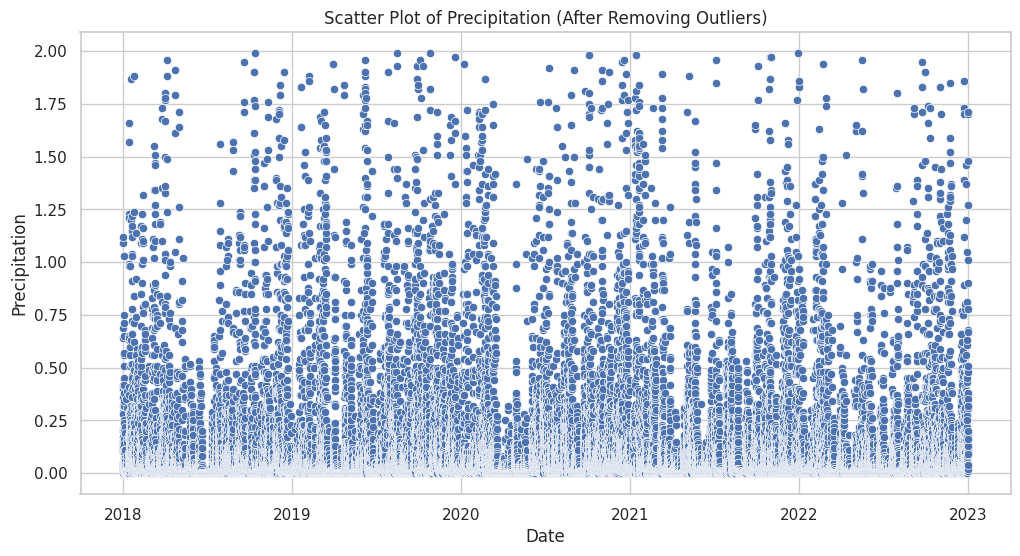

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df_filtered' is your DataFrame after removing outliers from 'PRECTOTCORR'

# Creating the scatter plot for 'PRECTOTCORR'
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_filtered.index, y=df_filtered['Precipitation'])
plt.title('Scatter Plot of Precipitation (After Removing Outliers)')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.show()



# FEATURES IMPORTANCE TEST FOR UNIVARIATE AND MULTIVARIATE MODELING ANALYSIS

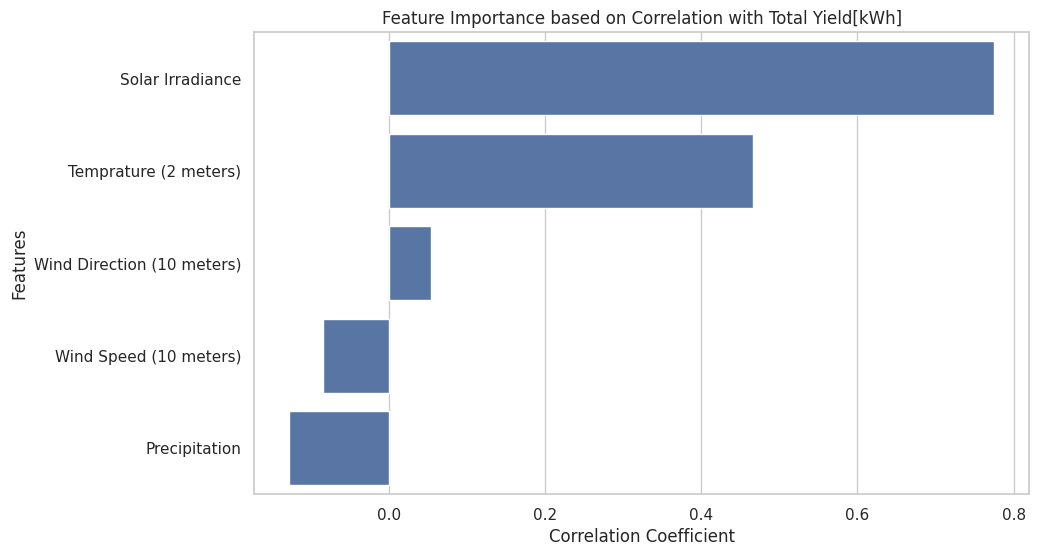

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming historical_data is your updated DataFrame with renamed features

# Drop 'Year' and 'Month' columns if they are present in historical_data
if 'Year' in historical_data.columns and 'Month' in historical_data.columns:
    historical_data = historical_data.drop(['Year', 'Month'], axis=1)

# Calculate correlation coefficients with the target variable, specifying numeric_only
correlation_with_target = historical_data.corr(numeric_only=True)['Total Yield[kWh]'].sort_values(ascending=False)

# Remove the correlation of the target variable with itself
correlation_with_target.drop('Total Yield[kWh]', inplace=True)

# Visualize the correlation coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index)
plt.title('Feature Importance based on Correlation with Total Yield[kWh]')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()


The correlation analysis of the features in relation to the 'Total Yield[kWh]' reveals a significant insight: only the first two features exhibit a positive correlation with the target variable. This finding suggests that these two features have a linear relationship with the total yield, where increases in their values are associated with increases in 'Total Yield[kWh]'.

In summary, the positive correlation of the first two features with 'Total Yield[kWh]' highlights their potential importance and warrants further investigation, especially in the context of predictive modeling and feature selection. This analysis forms a solid foundation for the next steps in the data science workflow, particularly in the realms of feature engineering and model development.

# UNIVARIATE DATA SET FOR MODELLING AND FORECASTING PV FUTURE GENERATION

In [ ]:


# Creating the Univariate_Analysis DataFrame
Univariate_Analysis = df[['Total Yield[kWh]']].copy()
Univariate_Analysis.index = df.index  # Using the same index as df

# Creating the Multivariate_Analysis DataFrame
Multivariate_Analysis = df[[
    'Total Yield[kWh]',
    'Solar Irradiance',
    'Temprature (2 meters)',
    'Wind Direction (10 meters)'
]].copy()
Multivariate_Analysis.index = df.index  # Using the same index as df



The Univariate Dataframe contains only the Total Yeild of the PV from 2019 - 2023 without any weather data

The Multivariate Dataframe contains the Total yeild of the PV from 2019 - 2023 and the correlating Weather Data of the All Sky Solar Irradiance, Temprature and Wind direction

In [ ]:
Univariate_Analysis

Total Yield[kWh]
DateTime                             
2018-01-01 01:00:00               0.0
2018-01-01 02:00:00               0.0
2018-01-01 03:00:00               0.0
2018-01-01 04:00:00               0.0
2018-01-01 05:00:00               0.0
...                               ...
2022-12-31 20:00:00               0.0
2022-12-31 21:00:00               0.0
2022-12-31 22:00:00               0.0
2022-12-31 23:00:00               0.0
2022-12-31 00:00:00               0.0

[43824 rows x 1 columns]

In [ ]:
Multivariate_Analysis

Total Yield[kWh]  Solar Irradiance  \
DateTime                                                  
2018-01-01 01:00:00               0.0               0.0   
2018-01-01 02:00:00               0.0               0.0   
2018-01-01 03:00:00               0.0               0.0   
2018-01-01 04:00:00               0.0               0.0   
2018-01-01 05:00:00               0.0               0.0   
...                               ...               ...   
2022-12-31 20:00:00               0.0               0.0   
2022-12-31 21:00:00               0.0               0.0   
2022-12-31 22:00:00               0.0               0.0   
2022-12-31 23:00:00               0.0               0.0   
2022-12-31 00:00:00               0.0               0.0   

                     Temprature (2 meters)  Wind Direction (10 meters)  
DateTime                                                                
2018-01-01 01:00:00                   5.76                      239.93  
2018-01-01 02:00:00                   6.07                      236.78  
2018-01-01 03:00:00                   6.23                      237.25  
2018-01-01 04:00:00                   6.12                      235.04  
2018-01-01 05:00:00                   6.02                      232.90  
...                                    ...                         ...  
2022-12-31 20:00:00                   8.84                      221.27  
2022-12-31 21:00:00                   8.92                      219.68  
2022-12-31 22:00:00                   8.90                      218.02  
2022-12-31 23:00:00                   8.75                      217.57  
2022-12-31 00:00:00                   8.62                      220.28  

[43824 rows x 4 columns]

In [ ]:
# TIME SERIES

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
import plotly.express as px

# Preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import StandardScaler

# train-test-split library
from sklearn.model_selection import train_test_split


#Machine Learning, Feature Importance and Evaluation Metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.ensemble import StackingRegressor
from numpy import mean
from sklearn.feature_selection import RFE
import pickle
from sklearn.metrics import roc_curve, auc
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.linear_model import Lasso
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [ ]:
# forward fill null
df.fillna(method = "ffill", inplace = True)

In [ ]:
df.head()

# FEATURES ENGINEERING ON THE MULTIVARIATE DATASET OF PV OUTPUT AND WEATHER VARIABLES

In [ ]:
import pandas as pd

# Assuming 'Multivariate_Analysis' is your original DataFrame
df = Multivariate_Analysis.copy()

# Feature Engineering
# Creating a new df with a hourly lag of 1 to see if there's a correlation between the previous hour pv with the next hours
#df["pv"] = df["Total Yield[kWh]"].shift(1)
df['Hour'] = df.index.hour
df['Day'] = df.index.day
df['Month'] = df.index.month
df['Year'] = df.index.year

# Define seasons based on month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['Season'] = df['Month'].apply(get_season)

# One-Hot Encode Seasons
season_dummies = pd.get_dummies(df['Season'], prefix='Season')
df = pd.concat([df, season_dummies], axis=1)

# Fill any remaining NaN values
df = df.fillna(0)

# Drop the original 'Season' column if not needed
df.drop(columns=['Season'], inplace=True)

# Display the updated DataFrame
df.head(10)


In [ ]:
# Prepare data for training
X = df.drop(columns=['Total Yield[kWh]']).values
y = df['Total Yield[kWh]'].values
print(X)

In [ ]:
# creating x and y training and test data
#cutoff = int(len(X) * 0.8)
#X_train, y_train = X.iloc[:cutoff], y.iloc[:cutoff]
#X_test, y_test = X.iloc[cutoff:], y.iloc[cutoff:]
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
X_test.shape

In [ ]:
y_test.shape

In [ ]:
# MODEL BUILDING

# MACHINE LEARNING MODEL BUILDING AND DEVELOPMENT


In [ ]:
# instantiate the model
lr_model = LinearRegression()
# fit X and y_train
lr_model.fit(X_train, y_train)

# prediction
y_pred = lr_model.predict(X_test)

#Linear Regression Model

In [ ]:
# evaluating the performance of linear regression model using regression evaluation metrics
training_mae = mean_absolute_error(y_train, lr_model.predict(X_train))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Training MAE:", round(training_mae, 2))
print("Test MAE:", round(mae,2))
print("MSE:", round(mse,2))
print("RMSE:", round(rmse, 2))
print("R-Squared:", round(r2, 2))

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Assuming 'df' is your prepared DataFrame
# Ensure that 'df' is the DataFrame created in your feature engineering step

# Prepare data for training and testing
X = df.drop(columns=['Total Yield[kWh]'])
y = df['Total Yield[kWh]']

# Split the data while retaining the DataFrame structure
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)



# Assuming 'lr_model' is your trained Linear Regression model
# Create the DataFrame with actual and predicted values
df_pred_test = pd.DataFrame(
    {
        "Actual": y_test,
        "Predicted": lr_model.predict(X_test),
    },
    index=y_test.index  # Ensure the index is aligned with the test dataset
)

# Resample the data to weekly means for better visualization
df_resampled = df_pred_test.resample("W").mean()

# Plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(df_resampled.index, df_resampled['Actual'], label='Actual')
plt.plot(df_resampled.index, df_resampled['Predicted'], label='Predicted', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Total Yield [kWh]')
plt.title('Linear Regression Model Actual vs Predicted PV Generation (Weekly Resampled)')
plt.legend()
plt.grid(True)
plt.show()

# Plot using Plotly
fig = px.line(df_resampled, labels={"value": "Total Yield [kWh]", "index": "Date"})
fig.add_scatter(x=df_resampled.index, y=df_resampled['Actual'], mode='lines', name='Actual')
fig.add_scatter(x=df_resampled.index, y=df_resampled['Predicted'], mode='lines', name='Predicted', line=dict(dash='dash'))
fig.update_layout(
    title="Linear Regression Model Actual vs Predicted PV Generation (Weekly Resampled)",
    xaxis_title="Date",
    yaxis_title="Total Yield [kWh]",
    legend_title="Legend"
)
fig.show()


# XG-BOOST MODEL

In [ ]:
# Define 1 FOLD XGBOOST model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=3, learning_rate=0.1)

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred = xgb_model.predict(X_test)

In [ ]:
# evaluating the performance of xgb model using regression evaluation metrics
training_mae = mean_absolute_error(y_train, xgb_model.predict(X_train))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Training MAE:", round(training_mae, 2))
print("Test MAE:", round(mae,2))
print("MSE:", round(mse,2))
print("RMSE:", round(rmse, 2))
print("R-Squared:", round(r2, 2))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence

# Import necessary packages
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define 1 FOLD XGBOOST model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=3, learning_rate=0.1)

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred = xgb_model.predict(X_test)

# Evaluating the performance of xgb model using regression evaluation metrics
training_mae = mean_absolute_error(y_train, xgb_model.predict(X_train))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Training MAE:", round(training_mae, 2))
print("Test MAE:", round(mae, 2))
print("MSE:", round(mse, 2))
print("RMSE:", round(rmse, 2))
print("R-Squared:", round(r2, 2))

# Sensitivity Analysis using Partial Dependence Plots (PDP)
# Perform PDP for each feature in the dataset
features = list(range(X_train.shape[1]))  # Assuming X_train is a pandas dataframe or numpy array
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'Feature {i+1}' for i in range(X_train.shape[1])]

# Plot Partial Dependence for each feature
fig, ax = plt.subplots(figsize=(15, 20))
plot_partial_dependence(xgb_model, X_train, features, feature_names=feature_names, grid_resolution=50, ax=ax)

# Adjust layout and display the plots
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Partial Dependence Plots for XGBoost Model", fontsize=18)
plt.show()




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Assuming 'df' is your prepared DataFrame
# Ensure that 'df' is the DataFrame created in your feature engineering step

# Prepare data for training and testing
X = df.drop(columns=['Total Yield[kWh]'])
y = df['Total Yield[kWh]']

# Split the data while retaining the DataFrame structure
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)



# Assuming 'xgb_model' is your trained XGBoost model
# Create the DataFrame with actual and predicted values
df_pred_test = pd.DataFrame(
    {
        "Actual": y_test,
        "Predicted": xgb_model.predict(X_test),
    },
    index=y_test.index  # Ensure the index is aligned with the test dataset
)

# Resample the data to weekly means for better visualization
df_resampled = df_pred_test.resample("W").mean()

# Plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(df_resampled.index, df_resampled['Actual'], label='Actual')
plt.plot(df_resampled.index, df_resampled['Predicted'], label='Predicted', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Total Yield [kWh]')
plt.title('XG-BOOST MODEL Actual vs Predicted PV Generation (Weekly Resampled)')
plt.legend()
plt.grid(True)
plt.show()

# Plot using Plotly
fig = px.line(df_resampled, labels={"value": "Total Yield [kWh]", "index": "Date"})
fig.add_scatter(x=df_resampled.index, y=df_resampled['Actual'], mode='lines', name='Actual')
fig.add_scatter(x=df_resampled.index, y=df_resampled['Predicted'], mode='lines', name='Predicted', line=dict(dash='dash'))
fig.update_layout(
    title="XG-BOOST MODEL Actual vs Predicted PV Generation (Weekly Resampled)",
    xaxis_title="Date",
    yaxis_title="Total Yield [kWh]",
    legend_title="Legend"
)
fig.show()


# K-NEAREST NEIGHBORS

In [ ]:
# Defining KNN  1 FOLDS
knn_model = KNeighborsRegressor(n_neighbors=5)

# fitting the model
knn_model.fit(X_train, y_train)

# Predicting the X_test
y_pred = knn_model.predict(X_test)

In [ ]:
# evaluating the performance of KNN model using regression evaluation metrics
training_mae = mean_absolute_error(y_train, knn_model.predict(X_train))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Printing the evaluation metrics
print("Training MAE:", round(training_mae, 2))
print("Test MAE:", round(mae,2))
print("MSE:", round(mse,2))
print("RMSE:", round(rmse, 2))
print("R-Squared:", round(r2, 2))

Training MAE: 1.33
Test MAE: 1.85
MSE: 12.79
RMSE: 3.58
R-Squared: 0.68


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Assuming 'df' is your prepared DataFrame
# Ensure that 'df' is the DataFrame created in your feature engineering step

# Prepare data for training and testing
X = df.drop(columns=['Total Yield[kWh]'])
y = df['Total Yield[kWh]']

# Split the data while retaining the DataFrame structure
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Building baseline model with which to compare our model's performance
y_pred_baseline = [y_train.mean()] * len(y_test)
mae_baseline = mean_absolute_error(y_test, y_pred_baseline)
print("Mean PV Readings:", round(y_train.mean(), 2))
print("Baseline MAE:", round(mae_baseline, 2))

# Assuming 'knn_model' is your trained K-Nearest Neighbors model
# Create the DataFrame with actual and predicted values
df_pred_test = pd.DataFrame(
    {
        "Actual": y_test,
        "Predicted": knn_model.predict(X_test),
    },
    index=y_test.index  # Ensure the index is aligned with the test dataset
)

# Resample the data to weekly means for better visualization
df_resampled = df_pred_test.resample("W").mean()

# Plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(df_resampled.index, df_resampled['Actual'], label='Actual')
plt.plot(df_resampled.index, df_resampled['Predicted'], label='Predicted (knn_model)', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Total Yield [kWh]')
plt.title('K-NEAREST NEIGHBORS Actual vs Predicted PV Generation (Weekly Resampled)')
plt.legend()
plt.grid(True)
plt.show()

# Plot using Plotly
fig = px.line(df_resampled, labels={"value": "Total Yield [kWh]", "index": "Date"})
fig.add_scatter(x=df_resampled.index, y=df_resampled['Actual'], mode='lines', name='Actual')
fig.add_scatter(x=df_resampled.index, y=df_resampled['Predicted'], mode='lines', name='Predicted (knn_model)', line=dict(dash='dash'))
fig.update_layout(
    title="K-NEAREST NEIGHBORS Actual vs Predicted PV Generation (Weekly Resampled)",
    xaxis_title="Date",
    yaxis_title="Total Yield [kWh]",
    legend_title="Legend"
)
fig.show()


## LASSO (Least Absolute Shrinkage and Selection Operator) MODEL

In [ ]:
# Define Lasso model
lasso_model = Lasso(alpha=0.1)

# Fit the model on the training data
lasso_model.fit(X_train, y_train)

# Predict on test set
y_pred = lasso_model.predict(X_test)

# Evaluate the model using RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 3.7549332633840216


In [ ]:
# evaluating the performance of svm model using regression evaluation metrics
training_mae = mean_absolute_error(y_train, lasso_model.predict(X_train))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Training MAE:", round(training_mae, 2))
print("Test MAE:", round(mae,2))
print("MSE:", round(mse,2))
print("RMSE:", round(rmse, 2))
print("R-Squared:", round(r2, 2))

Training MAE: 2.3
Test MAE: 2.49
MSE: 14.1
RMSE: 3.75
R-Squared: 0.65


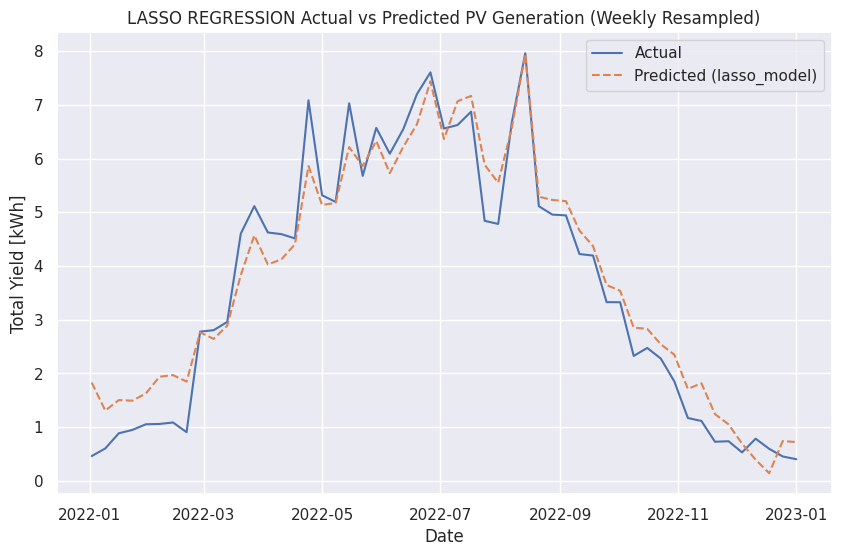

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Assuming 'df' is your prepared DataFrame
# Ensure that 'df' is the DataFrame created in your feature engineering step

# Prepare data for training and testing
X = df.drop(columns=['Total Yield[kWh]'])
y = df['Total Yield[kWh]']

# Split the data while retaining the DataFrame structure
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


# Assuming 'lasso_model' is your trained Lasso Regression model
# Create the DataFrame with actual and predicted values
df_pred_test = pd.DataFrame(
    {
        "Actual": y_test,
        "Predicted": lasso_model.predict(X_test),
    },
    index=y_test.index  # Ensure the index is aligned with the test dataset
)

# Resample the data to weekly means for better visualization
df_resampled = df_pred_test.resample("W").mean()

# Plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(df_resampled.index, df_resampled['Actual'], label='Actual')
plt.plot(df_resampled.index, df_resampled['Predicted'], label='Predicted (lasso_model)', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Total Yield [kWh]')
plt.title('LASSO REGRESSION Actual vs Predicted PV Generation (Weekly Resampled)')
plt.legend()
plt.grid(True)
plt.show()

# Plot using Plotly
fig = px.line(df_resampled, labels={"value": "Total Yield [kWh]", "index": "Date"})
fig.add_scatter(x=df_resampled.index, y=df_resampled['Actual'], mode='lines', name='Actual')
fig.add_scatter(x=df_resampled.index, y=df_resampled['Predicted'], mode='lines', name='Predicted (lasso_model)', line=dict(dash='dash'))
fig.update_layout(
    title="Actual vs Predicted PV Generation (Weekly Resampled)",
    xaxis_title="Date",
    yaxis_title="Total Yield [kWh]",
    legend_title="Legend"
)
fig.show()


## SUPPORT VECTOR REGRESSION MODEL

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd
import plotly.express as px
import numpy as np

# Use the best parameters found from the grid search
svr_model = SVR(kernel='rbf', C=10, epsilon=0.1, gamma=0.01)

# Fit the model on the training data
svr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svr_model.predict(X_test)

# Evaluate the performance of the SVM model using regression evaluation metrics
training_mae = mean_absolute_error(y_train, svr_model.predict(X_train))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Training MAE:", round(training_mae, 2))
print("Test MAE:", round(mae, 2))
print("MSE:", round(mse, 2))
print("RMSE:", round(rmse, 2))
print("R-Squared:", round(r2, 2))



Training MAE: 0.4
Test MAE: 1.97
MSE: 12.3
RMSE: 3.51
R-Squared: 0.69


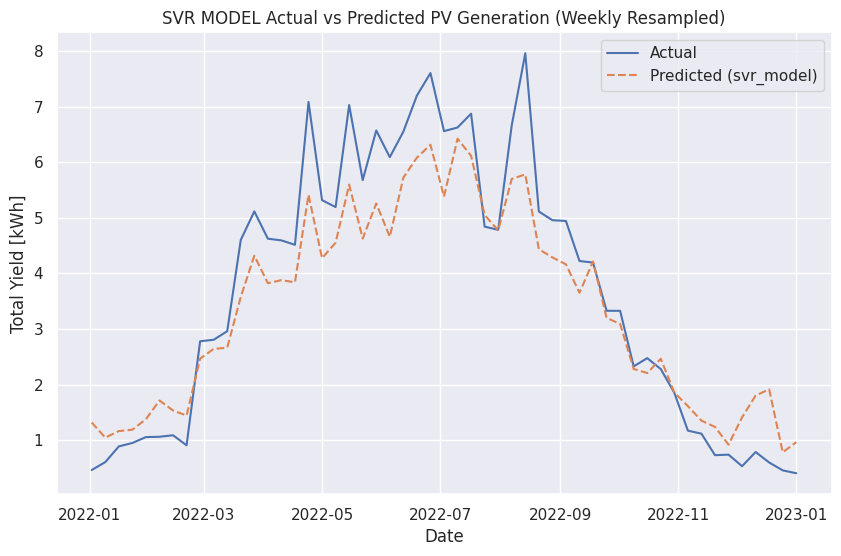

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Assuming 'df' is your prepared DataFrame
# Ensure that 'df' is the DataFrame created in your feature engineering step

# Prepare data for training and testing
X = df.drop(columns=['Total Yield[kWh]'])
y = df['Total Yield[kWh]']

# Split the data while retaining the DataFrame structure
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Assuming 'svr_model' is your trained Support Vector Regression model
# Create the DataFrame with actual and predicted values
df_pred_test = pd.DataFrame(
    {
        "Actual": y_test,
        "Predicted": svr_model.predict(X_test),
    },
    index=y_test.index  # Ensure the index is aligned with the test dataset
)

# Resample the data to weekly means for better visualization
df_resampled = df_pred_test.resample("W").mean()

# Plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(df_resampled.index, df_resampled['Actual'], label='Actual')
plt.plot(df_resampled.index, df_resampled['Predicted'], label='Predicted (svr_model)', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Total Yield [kWh]')
plt.title('SVR MODEL Actual vs Predicted PV Generation (Weekly Resampled)')
plt.legend()
plt.grid(True)
plt.show()

# Plot using Plotly
fig = px.line(df_resampled, labels={"value": "Total Yield [kWh]", "index": "Date"})
fig.add_scatter(x=df_resampled.index, y=df_resampled['Actual'], mode='lines', name='Actual')
fig.add_scatter(x=df_resampled.index, y=df_resampled['Predicted'], mode='lines', name='Predicted (svr_model)', line=dict(dash='dash'))
fig.update_layout(
    title="SVR MODEL Actual vs Predicted PV Generation (Weekly Resampled)",
    xaxis_title="Date",
    yaxis_title="Total Yield [kWh]",
    legend_title="Legend"
)
fig.show()


In [ ]:
# Stack

# STACK ESSEMBLE MODEL USING LINEEAR REGRESSION AS META MODEL

In [ ]:
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
import xgboost as xgb
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd
import plotly.express as px
import numpy as np

def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lasso', Lasso(alpha=0.01)))
    level0.append(('knn', KNeighborsRegressor(n_neighbors=11, weights='uniform', metric='euclidean')))
    level0.append(('svm', SVR(kernel='rbf', C=10, epsilon=0.1, gamma=0.01)))
    level0.append(('xgb', xgb.XGBRegressor(
        objective='reg:squarederror',
        n_estimators=100,
        max_depth=3,
        learning_rate=0.05,
        subsample=0.6,
        colsample_bytree=0.6,
        gamma=0,
        reg_alpha=0.5,
        reg_lambda=1
    )))

    # define meta learner model
    level1 = LinearRegression()

    # define the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=4)

    return model

# Example usage:
stacked_model = get_stacking()

# Fit the model on the training data
stacked_model.fit(X_train, y_train)

# Predict on the test set
y_pred = stacked_model.predict(X_test)

# Evaluate the performance of the stacked model using regression evaluation metrics
training_mae = mean_absolute_error(y_train, stacked_model.predict(X_train))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Training MAE:", round(training_mae, 2))
print("Test MAE:", round(mae, 2))
print("MSE:", round(mse, 2))
print("RMSE:", round(rmse, 2))
print("R-Squared:", round(r2, 2))

# Create a dataframe for the test and prediction
df_pred_test = pd.DataFrame(
    {
        "y_test": y_test,
        "y_pred": y_pred
    }
)
df_pred_test.head()

# Line chart of test and prediction data
df = df_pred_test.resample("1W").mean()

fig = px.line(df, labels={"value": "PV stacked model"})
fig.update_layout(height=400, width=700)
fig.show()


Training MAE: 1.19
Test MAE: 1.38
MSE: 5.8
RMSE: 2.41
R-Squared: 0.86


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Assuming 'df' is your prepared DataFrame
# Ensure that 'df' is the DataFrame created in your feature engineering step



X = df.drop(columns=['Total Yield[kWh]'])
y = df['Total Yield[kWh]']

# Split the data while retaining the DataFrame structure
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Assuming 'stacked_model' is your trained stacked model
# Create the DataFrame with actual and predicted values
df_pred_test = pd.DataFrame(
    {
        "Actual": y_test,
        "Predicted": stacked_model.predict(X_test),
    },
    index=y_test.index  # Ensure the index is aligned with the test dataset
)

# Resample the data to weekly means for better visualization
df_resampled = df_pred_test.resample("W").mean()

# Plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(df_resampled.index, df_resampled['Actual'], label='Actual')
plt.plot(df_resampled.index, df_resampled['Predicted'], label='Predicted (stacked_model)', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Total Yield [kWh]')
plt.title('STACKED MODEL Actual vs Predicted PV Generation (Weekly Resampled)')
plt.legend()
plt.grid(True)
plt.show()

# Plot using Plotly
fig = px.line(df_resampled, labels={"value": "Total Yield [kWh]", "index": "Date"})
fig.add_scatter(x=df_resampled.index, y=df_resampled['Actual'], mode='lines', name='Actual')
fig.add_scatter(x=df_resampled.index, y=df_resampled['Predicted'], mode='lines', name='Predicted (stacked_model)', line=dict(dash='dash'))
fig.update_layout(
    title="STACKED MODEL Actual vs Predicted PV Generation (Weekly Resampled)",
    xaxis_title="Date",
    yaxis_title="Total Yield [kWh]",
    legend_title="Legend"
)
fig.show()


KeyError: "['Total Yield[kWh]'] not found in axis"

#STACK ESSEMBLE MODEL USING COLLABORATIVE LEARNING INTEGRATION

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np

# Define the primary models in the order they should learn from residuals.
def get_cli_models():
    models = [
        ('lasso', Lasso(alpha=0.01)),
        ('knn', KNeighborsRegressor(n_neighbors=11, weights='uniform', metric='euclidean')),
        ('svr', SVR(kernel='rbf', C=10, epsilon=0.1, gamma=0.01)),
        ('xgb', xgb.XGBRegressor(
            objective='reg:squarederror',
            n_estimators=100,
            max_depth=3,
            learning_rate=0.05,
            subsample=0.6,
            colsample_bytree=0.6,
            gamma=0,
            reg_alpha=0.5,
            reg_lambda=1
        ))
    ]
    return models

# Train and predict using CLI stacking
def train_cli_stacking(X_train, y_train, X_test):
    # Get the list of models for CLI stacking
    models = get_cli_models()

    # Initialize the training and prediction variables
    y_train_residual = y_train
    y_pred = None

    # Train each model in the sequence to refine residuals
    for name, model in models:
        print(f"Training model: {name}")
        model.fit(X_train, y_train_residual)

        # Get predictions on the training data
        y_train_pred = model.predict(X_train)

        # Calculate residuals for the next model in the sequence
        y_train_residual = y_train_residual - y_train_pred

        # Predict on the test set and accumulate predictions
        if y_pred is None:
            y_pred = model.predict(X_test)
        else:
            y_pred += model.predict(X_test)

    return y_pred

# Example usage:

# Assuming X_train, X_test, y_train, y_test are already defined and preprocessed
y_pred_cli = train_cli_stacking(X_train, y_train, X_test)

# Evaluate the performance of the CLI stacked model using regression evaluation metrics
training_mae = mean_absolute_error(y_train, y_train - y_train_residual)
mae = mean_absolute_error(y_test, y_pred_cli)
mse = mean_squared_error(y_test, y_pred_cli)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_cli)

# Print the evaluation metrics
print("Training MAE:", round(training_mae, 2))
print("Test MAE:", round(mae, 2))
print("MSE:", round(mse, 2))
print("RMSE:", round(rmse, 2))
print("R-Squared:", round(r2, 2))

# Create a dataframe for the test and prediction
df_pred_test = pd.DataFrame(
    {
        "y_test": y_test,
        "y_pred_cli": y_pred_cli
    }
)

# Optionally, display head of the data
print(df_pred_test.head())

# Line chart of test and prediction data (optional)
import plotly.express as px

df = df_pred_test.resample("1W").mean()
fig = px.line(df, labels={"value": "PV CLI stacked model"})
fig.update_layout(height=400, width=700)
fig.show()


Training model: lasso
Training model: knn
Training model: svr


#STACKED ESSEMBLE WITH XGBOOST AS THE META LEARNER

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
import xgboost as xgb
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd
import plotly.express as px
import numpy as np

def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lasso', Lasso(alpha=0.01)))
    level0.append(('knn', KNeighborsRegressor(n_neighbors=11, weights='uniform', metric='euclidean')))
    level0.append(('svm', SVR(kernel='rbf', C=10, epsilon=0.1, gamma=0.01)))
    level0.append(('xgb', xgb.XGBRegressor(
        objective='reg:squarederror',
        n_estimators=100,
        max_depth=3,
        learning_rate=0.05,
        subsample=0.6,
        colsample_bytree=0.6,
        gamma=0,
        reg_alpha=0.5,
        reg_lambda=1
    )))

    # define meta learner model using XGBoost
    level1 = xgb.XGBRegressor(
        objective='reg:squarederror',
        n_estimators=100,
        max_depth=3,
        learning_rate=0.05,
        subsample=0.6,
        colsample_bytree=0.6,
        gamma=0,
        reg_alpha=0.5,
        reg_lambda=1
    )

    # define the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=4)

    return model

# Example usage:
stacked_model = get_stacking()

# Fit the model on the training data
stacked_model.fit(X_train, y_train)

# Predict on the test set
y_pred = stacked_model.predict(X_test)

# Evaluate the performance of the stacked model using regression evaluation metrics
training_mae = mean_absolute_error(y_train, stacked_model.predict(X_train))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Training MAE:", round(training_mae, 2))
print("Test MAE:", round(mae, 2))
print("MSE:", round(mse, 2))
print("RMSE:", round(rmse, 2))
print("R-Squared:", round(r2, 2))

# Create a dataframe for the test and prediction
df_pred_test = pd.DataFrame(
    {
        "y_test": y_test,
        "y_pred": y_pred
    }
)
df_pred_test.head()

# Line chart of test and prediction data
df = df_pred_test.resample("1W").mean()

fig = px.line(df, labels={"value": "PV stacked model"})
fig.update_layout(height=400, width=700)
fig.show()


# Trained Model Export

In [ ]:
# model export

In [ ]:
import joblib
joblib.dump(lr_model, "LinearRegressor.pkl")
lr = joblib.load("LinearRegressor.pkl")

In [ ]:
import joblib
joblib.dump(svr_model, "svrmodelsaving.pkl")


In [ ]:
svrreload = joblib.load("svrmodelsaving.pkl")

In [ ]:
# using linear Regression to predict

In [ ]:
#reshaping value for prediction
x = np.array(35).reshape(1, -1)

In [ ]:
# predict next hour pv generation assuming generation for previous hour was 35
lr.predict(x)

In [ ]:
#using svrloaded to predict
#reshaping value for prediction
xx = np.array(145).reshape(1, -1)

In [ ]:
# predict next hour pv generation assuming generation for previous hour was 35
svrreload.predict(xx)

In [ ]:
# Step 1: Initialize models with tuned hyperparameters
lasso = Lasso(alpha=0.01, max_iter=1000, tol=0.0001, selection='cyclic', random_state=42)
knn = KNeighborsRegressor(n_neighbors=11, weights='uniform', metric='euclidean')
svr = SVR(kernel='rbf', C=10, epsilon=0.1, gamma=0.01)
xgb = XGBRegressor(objective='reg', n_estimators=100, max_depth=3,
                   learning_rate=0.05, subsample=0.6, colsample_bytree=0.6,
                   reg_alpha=0.5, reg_lambda=1)

# Step 2: Fit models sequentially, passing residuals
# Train LASSO model
lasso.fit(X_train, y_train)
pred_lasso = lasso.predict(X_train)
residual_lasso = y_train - pred_lasso

# Train KNN on residuals from LASSO
knn.fit(X_train, residual_lasso)
pred_knn = knn.predict(X_train)
residual_knn = residual_lasso - pred_knn

# Train SVR on residuals from KNN
svr.fit(X_train, residual_knn)
pred_svr = svr.predict(X_train)
residual_svr = residual_knn - pred_svr

# Train XGB on residuals from SVR
xgb.fit(X_train, residual_svr)
final_predictions = pred_lasso + pred_knn + pred_svr + xgb.predict(X_train)

# Step 3: Evaluate the final ensemble model
performance_metrics = evaluate(final_predictions, y_train)


NameError: name 'Lasso' is not defined